### Load speeches

In [1]:
import pandas as pd
import numpy as np
from nltk import sent_tokenize
from modules.nlputils import StemFilterTokenizeProcessor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

speeches_df = pd.read_csv('output/speeches/senate-speeches-201806.csv', index_col='CodigoPronunciamento')
speeches = speeches_df[['TextoIntegral']]
speeches = [s[0] for s in speeches.values[:]]

# labels = speeches_df[['NomeAutor']]
# labels = [s[0] for s in labels.values[:]]

speeches_df.head(1)

TipoPronunciamento        Data SiglaCasa TipoSessao  \
CodigoPronunciamento                                                       
446075                   Pronunciamento  2018-06-01        SF        NDL   

                            NomeAutor  CodigoParlamentar Partido  UF  \
CodigoPronunciamento                                                   
446075                Roberto Requião                 72     MDB  PR   

                     SexoParlamentar DataNascimentoParlamentar  \
CodigoPronunciamento                                             
446075                     Masculino                1941-03-05   

                                                              Indexacao  \
CodigoPronunciamento                                                      
446075                CRITICA, GESTÃO, GOVERNO FEDERAL, MICHEL TEMER...   

                                                          TextoIntegral  
CodigoPronunciamento                                                     
446075                     O SR. ROBERTO REQUIÃO  (Bloco Maioria/MDB...

### TSNE Sents Clustering Visualization

Mas em determinado momento, em função das suas próprias contradições, o sistema comunista na Europa desaparece.
 determinado momento função contradições sistema comunista europa
[0. 0. 0. ... 0. 0. 0.]
Então, nesse momento há um recrudescimento dos detentores do capital.
 momento recrudescimento detentores capital
[0. 0. 0. ... 0. 0. 0.]
Presidente, obrigado pelo tempo que...     O Sr. Paulo Paim  (Bloco Parlamentar da Resistência Democrática/PT - RS) – Senador Requião...     O SR. ROBERTO REQUIÃO  (Bloco Maioria/MDB - PR) – Como não, Senador Paim?
O SR. ROBERTO REQUIÃO  (Bloco Maioria/MDB - PR) – Sim, exatamente.
O SR. ROBERTO REQUIÃO  (Bloco Maioria/MDB - PR) – Senador, eu diria mais.
O SR. ROBERTO REQUIÃO  (Bloco Maioria/MDB - PR) – Nunca aceitei o Joaquim Levy.
O SR. PAULO PAIM  (Bloco Parlamentar da Resistência Democrática/PT - RS) – Senador Requião, eu peço ao nosso querido Senador Thieres que, dentro do possível, possa nos dar um tempo maior – sei que V. Exª dará – pela importân

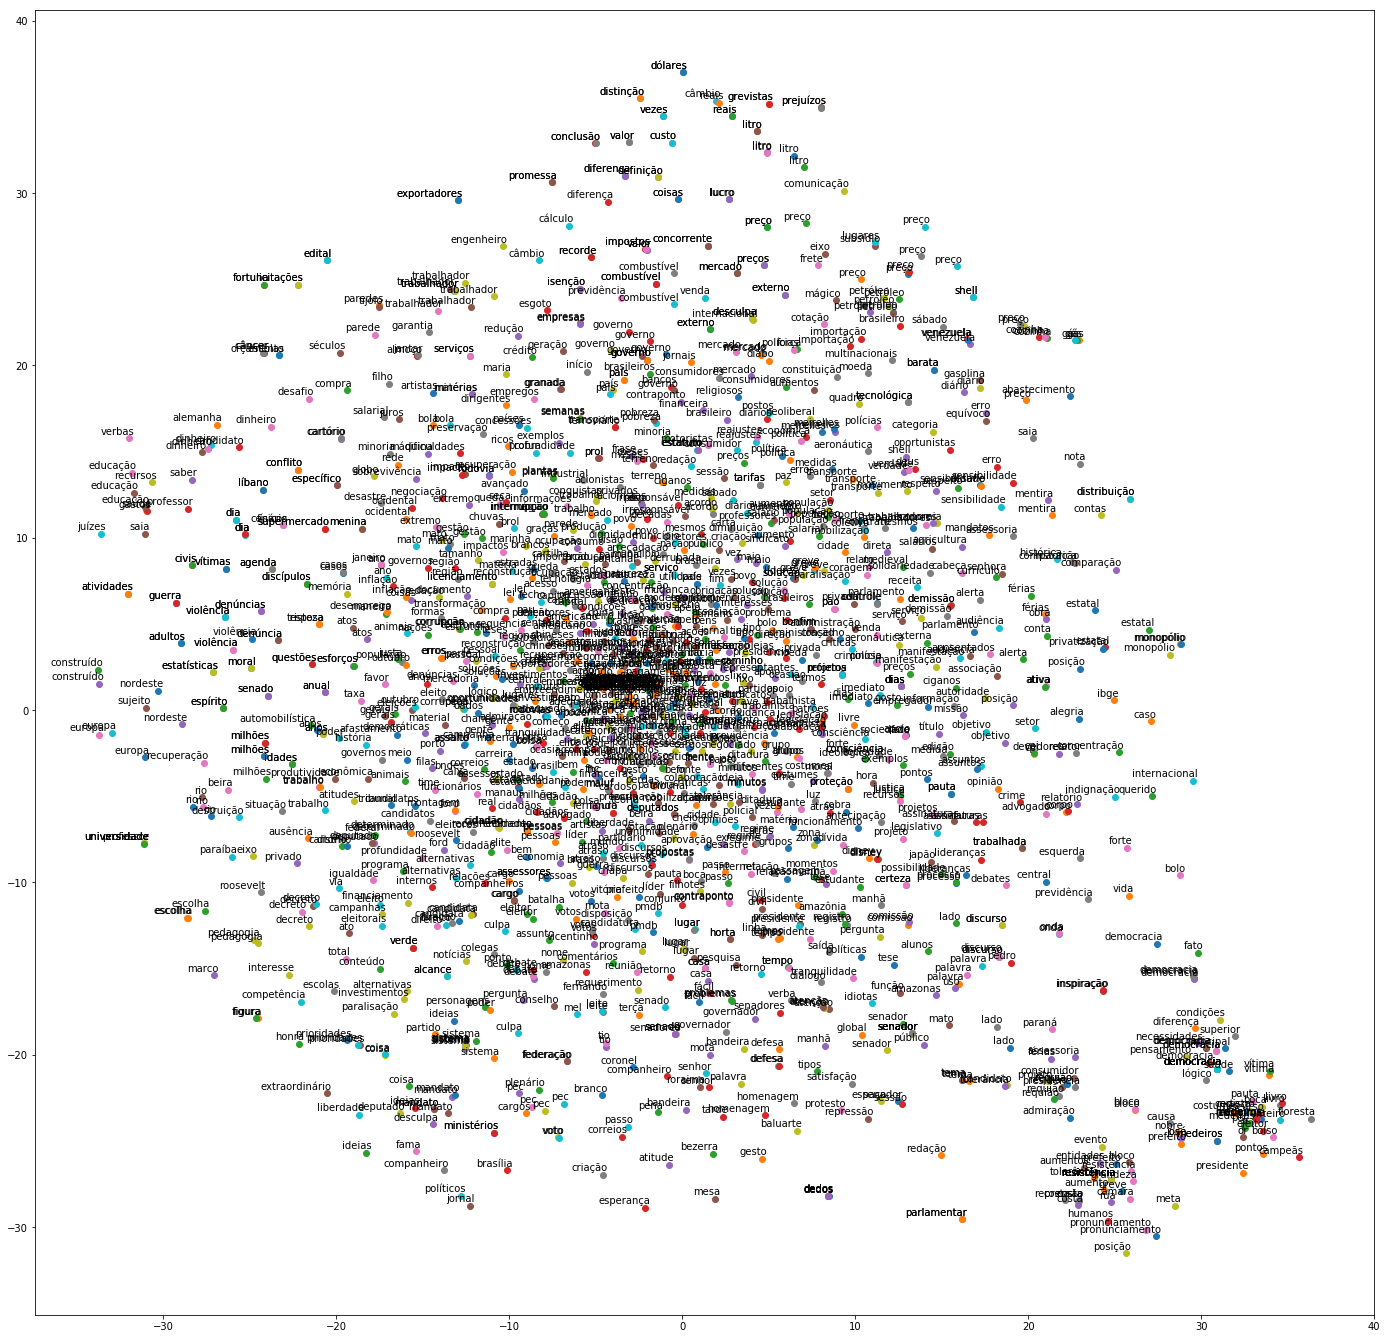

In [2]:
sents = []
for s in speeches[:20]:
    for st in sent_tokenize(s):
        sents = np.append(sents, st)
sents = [s for s in sents if len(s)>60]

# stopwords = set([line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8')])
stopwords = []

proc = StemFilterTokenizeProcessor(min_size=3, filter_regex='[a-z]', stem_language='portuguese', stem_complete=True, only_nouns=True)
vec = TfidfVectorizer(min_df=2, max_df=0.95, stop_words=stopwords, analyzer='word', ngram_range=(1, 1), preprocessor=proc.process_text)
X = vec.fit_transform(sents)
print(sents[10])
print(proc.process_text(sents[10]))
print(X.toarray()[10])
print(sents[11])
print(proc.process_text(sents[11]))
print(X.toarray()[11])

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X.toarray())

%matplotlib inline
from matplotlib import pyplot as plt

x = []
y = []
for value in X_2d:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(24, 24)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    #show central keyword as label
    xx = X.toarray()[i]
    ti = np.argmax(xx)
    keyword = vec.get_feature_names()[ti]
    plt.annotate(keyword,
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

### Speech sents clustering with KMeans

In [3]:
proc = StemFilterTokenizeProcessor(min_size=4, filter_regex='[a-z]', stem_language='portuguese', stem_complete=True, only_nouns=True)
vec = TfidfVectorizer(min_df=0.01, stop_words=stopwords, analyzer='word', ngram_range=(1, 2), preprocessor=proc.process_text)
X = vec.fit_transform(sents)

n_clusters = 20
kmeans_model = KMeans(n_clusters=n_clusters)
y_kmeans = kmeans_model.fit_predict(X)

NOT NOUN: –
NOT NOUN: ,
NOT NOUN: paim
NOT NOUN: ,
NOT NOUN: vou
NOT NOUN: aproveitar
NOT NOUN: esta
NOT NOUN: para
NOT NOUN: repetir
NOT NOUN: o
NOT NOUN: mantra
NOT NOUN: que
NOT NOUN: eu
NOT NOUN: venho
NOT NOUN: repetindo
NOT NOUN: com
NOT NOUN: insistência
NOT NOUN: sobre
NOT NOUN: o
NOT NOUN: que
NOT NOUN: realmente
NOT NOUN: está
NOT NOUN: acontecendo
NOT NOUN: no
NOT NOUN: brasil
NOT NOUN: .
NOT NOUN: estamos
NOT NOUN: ,
NOT NOUN: paim
NOT NOUN: ,
NOT NOUN: descolados
NOT NOUN: de
NOT NOUN: uma
NOT NOUN: global
NOT NOUN: .
NOT NOUN: o
NOT NOUN: francisco
NOT NOUN: ,
NOT NOUN: quando
NOT NOUN: os
NOT NOUN: mais
NOT NOUN: poderosos
NOT NOUN: do
NOT NOUN: se
NOT NOUN: reuniam
NOT NOUN: em
NOT NOUN: davos
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: os
NOT NOUN: mais
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: os
NOT NOUN: concentradores
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: dizia
NOT NOUN: :
NOT NOUN: ``
NOT NOUN: o
NOT NOUN: é
NOT NOUN: bom
NOT NOUN: quando
NOT NOUN: ele
NOT NOUN: é
NOT NOUN: investi

NOT NOUN: seriam
NOT NOUN: 4,5
NOT NOUN: de
NOT NOUN: ao
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: que
NOT NOUN: muito
NOT NOUN: àquela
NOT NOUN: .
NOT NOUN: eles
NOT NOUN: tinham
NOT NOUN: outra
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: como
NOT NOUN: a
NOT NOUN: brasileira
NOT NOUN: hoje
NOT NOUN: ,
NOT NOUN: conversível
NOT NOUN: .
NOT NOUN: então
NOT NOUN: ,
NOT NOUN: ou
NOT NOUN: eles
NOT NOUN: aplicavam
NOT NOUN: dentro
NOT NOUN: da
NOT NOUN: alemanha
NOT NOUN: ou
NOT NOUN: o
NOT NOUN: desapareceria
NOT NOUN: .
NOT NOUN: e
NOT NOUN: surgiram
NOT NOUN: os
NOT NOUN: grandes
NOT NOUN: de
NOT NOUN: infraestrutura
NOT NOUN: e
NOT NOUN: de
NOT NOUN: da
NOT NOUN: alemanha
NOT NOUN: .
NOT NOUN: os
NOT NOUN: unidos
NOT NOUN: viviam
NOT NOUN: uma
NOT NOUN: brutal
NOT NOUN: em
NOT NOUN: daquele
NOT NOUN: imobiliário
NOT NOUN: da
NOT NOUN: flórida
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: se
NOT NOUN: sabia
NOT NOUN: o
NOT NOUN: que
NOT NOUN: fazer
NOT NOUN: .
NOT NOUN: mas
NOT NOUN: um

NOT NOUN: ,
NOT NOUN: quem
NOT NOUN: está
NOT NOUN: ficando
NOT NOUN: com
NOT NOUN: a
NOT NOUN: verdadeira
NOT NOUN: mais-valia
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: é
NOT NOUN: o
NOT NOUN: .
NOT NOUN: a
NOT NOUN: mais-valia
NOT NOUN: é
NOT NOUN: o
NOT NOUN: que
NOT NOUN: se
NOT NOUN: acrescenta
NOT NOUN: no
NOT NOUN: produtivo
NOT NOUN: pelo
NOT NOUN: ao
NOT NOUN: de
NOT NOUN: uma
NOT NOUN: .
NOT NOUN: eles
NOT NOUN: esterilizam
NOT NOUN: esse
NOT NOUN: jogando
NOT NOUN: na
NOT NOUN: rolagem
NOT NOUN: da
NOT NOUN: pública
NOT NOUN: e
NOT NOUN: enriquecem
NOT NOUN: cada
NOT NOUN: mais
NOT NOUN: .
NOT NOUN: mas
NOT NOUN: ,
NOT NOUN: como
NOT NOUN: há
NOT NOUN: conscientização
NOT NOUN: de
NOT NOUN: que
NOT NOUN: quem
NOT NOUN: está
NOT NOUN: predando
NOT NOUN: a
NOT NOUN: no
NOT NOUN: brasil
NOT NOUN: é
NOT NOUN: o
NOT NOUN: financeiro
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: financeirização
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: eles
NOT NOUN: ,
NOT NOUN: induzidos
NOT NOUN:

NOT NOUN: pec
NOT NOUN: ,
NOT NOUN: propondo
NOT NOUN: a
NOT NOUN: das
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: há
NOT NOUN: nenhum
NOT NOUN: de
NOT NOUN: este
NOT NOUN: .
NOT NOUN: quando
NOT NOUN: outras
NOT NOUN: viáveis
NOT NOUN: poderiam
NOT NOUN: apresentadas
NOT NOUN: ,
NOT NOUN: nenhuma
NOT NOUN: delas
NOT NOUN: ele
NOT NOUN: teve
NOT NOUN: de
NOT NOUN: apresentar
NOT NOUN: ,
NOT NOUN: até
NOT NOUN: porque
NOT NOUN: apresentou
NOT NOUN: aquela
NOT NOUN: tal
NOT NOUN: de
NOT NOUN: pec
NOT NOUN: 95
NOT NOUN: ,
NOT NOUN: congelando
NOT NOUN: todos
NOT NOUN: os
NOT NOUN: .
NOT NOUN: se
NOT NOUN: congelou
NOT NOUN: o
NOT NOUN: ,
NOT NOUN: agora
NOT NOUN: ele
NOT NOUN: tem
NOT NOUN: de
NOT NOUN: fazer
NOT NOUN: rearranjo
NOT NOUN: ;
NOT NOUN: arranjar
NOT NOUN: aquilo
NOT NOUN: que
NOT NOUN: é
NOT NOUN: impossível
NOT NOUN: da
NOT NOUN: como
NOT NOUN: ele
NOT NOUN: construiu
NOT NOUN: .
NOT NOUN: eu
NOT NOUN: dizia
NOT NOUN: :
NOT NOUN: a
NOT NOUN: vai
NOT NOUN: mostrar
NOT NOUN: o
NOT

NOT NOUN: copel
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: paraná
NOT NOUN: ,
NOT NOUN: está
NOT NOUN: sendo
NOT NOUN: roubada
NOT NOUN: também
NOT NOUN: por
NOT NOUN: um
NOT NOUN: absolutamente
NOT NOUN: irresponsável
NOT NOUN: e
NOT NOUN: corrompido
NOT NOUN: .
NOT NOUN: o
NOT NOUN: paulo
NOT NOUN: paim
NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: da
NOT NOUN: democrática/pt
NOT NOUN: -
NOT NOUN: rs
NOT NOUN: )
NOT NOUN: –
NOT NOUN: com
NOT NOUN: essa
NOT NOUN: ,
NOT NOUN: inclusive
NOT NOUN: ,
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: na
NOT NOUN: sua
NOT NOUN: ...
NOT NOUN: porque
NOT NOUN: outros
NOT NOUN: podem
NOT NOUN: :
NOT NOUN: ``
NOT NOUN: ,
NOT NOUN: isso
NOT NOUN: passa
NOT NOUN: despercebido
NOT NOUN: .
NOT NOUN: ''
NOT NOUN: olha
NOT NOUN: um
NOT NOUN: com
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: e
NOT NOUN: com
NOT NOUN: outros
NOT NOUN: do
NOT NOUN: pt
NOT NOUN: ,
NOT NOUN: do
NOT NOUN: pdt
NOT NOUN: ,
NOT NOUN: do
NOT NOUN: pcdob
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: quem
NOT NOUN: for
NOT

NOT NOUN: e
NOT NOUN: o
NOT NOUN: tal
NOT NOUN: do
NOT NOUN: autônomo
NOT NOUN: exclusivo
NOT NOUN: .
NOT NOUN: poderíamos
NOT NOUN: aqui
NOT NOUN: que
NOT NOUN: ,
NOT NOUN: se
NOT NOUN: tivermos
NOT NOUN: uma
NOT NOUN: que
NOT NOUN: eu
NOT NOUN: espero
NOT NOUN: que
NOT NOUN: seja
NOT NOUN: a
NOT NOUN: curto
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: a
NOT NOUN: chama
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: a
NOT NOUN: das
NOT NOUN: ,
NOT NOUN: então
NOT NOUN: ,
NOT NOUN: ilumine
NOT NOUN: –
NOT NOUN: ilumine
NOT NOUN: –
NOT NOUN: o
NOT NOUN: de
NOT NOUN: todos
NOT NOUN: para
NOT NOUN: que
NOT NOUN: possamos
NOT NOUN: ,
NOT NOUN: então
NOT NOUN: ,
NOT NOUN: assegurar
NOT NOUN: ali
NOT NOUN: ,
NOT NOUN: na
NOT NOUN: ,
NOT NOUN: uma
NOT NOUN: que
NOT NOUN: olhe
NOT NOUN: para
NOT NOUN: o
NOT NOUN: da
NOT NOUN: nossa
NOT NOUN: .
NOT NOUN: thieres
NOT NOUN: ,
NOT NOUN: nesta
NOT NOUN: aqui
NOT NOUN: –
NOT NOUN: e
NOT NOUN: muitos
NOT NOUN: gostam
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: day
NO

NOT NOUN: da
NOT NOUN: quase
NOT NOUN: zero
NOT NOUN: .
NOT NOUN: estou
NOT NOUN: falando
NOT NOUN: sério
NOT NOUN: ,
NOT NOUN: é
NOT NOUN: quase
NOT NOUN: zero
NOT NOUN: ,
NOT NOUN: é
NOT NOUN: quase
NOT NOUN: doada
NOT NOUN: a
NOT NOUN: na
NOT NOUN: venezuela
NOT NOUN: .
NOT NOUN: por
NOT NOUN: pior
NOT NOUN: que
NOT NOUN: fosse
NOT NOUN: a
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: é
NOT NOUN: o
NOT NOUN: que
NOT NOUN: eu
NOT NOUN: recomendo
NOT NOUN: ,
NOT NOUN: estaríamos
NOT NOUN: melhor
NOT NOUN: do
NOT NOUN: que
NOT NOUN: na
NOT NOUN: venezuela
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: a
NOT NOUN: doada
NOT NOUN: a
NOT NOUN: todos
NOT NOUN: os
NOT NOUN: que
NOT NOUN: pararem
NOT NOUN: em
NOT NOUN: um
NOT NOUN: de
NOT NOUN: .
NOT NOUN: a
NOT NOUN: tem
NOT NOUN: que
NOT NOUN: eficiente
NOT NOUN: para
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: isso
NOT NOUN: ,
NOT NOUN: usarmos
NOT NOUN: os
NOT NOUN: que
NOT NOUN: vão
NOT NOUN: para
NOT NOUN: o
NOT NOUN: para
NOT NOUN: investir
NOT NOUN:

NOT NOUN: mais
NOT NOUN: elétrico
NOT NOUN: .
NOT NOUN: e
NOT NOUN: ,
NOT NOUN: aqui
NOT NOUN: ,
NOT NOUN: elétrico
NOT NOUN: com
NOT NOUN: solar
NOT NOUN: ,
NOT NOUN: uma
NOT NOUN: ao
NOT NOUN: nosso
NOT NOUN: ,
NOT NOUN: aqui
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: é
NOT NOUN: o
NOT NOUN: grande
NOT NOUN: da
NOT NOUN: solar
NOT NOUN: .
NOT NOUN: e
NOT NOUN: amanhã
NOT NOUN: eu
NOT NOUN: vou
NOT NOUN: trazer
NOT NOUN: para
NOT NOUN: cá
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: eu
NOT NOUN: acho
NOT NOUN: que
NOT NOUN: devemos
NOT NOUN: fazer
NOT NOUN: para
NOT NOUN: o
NOT NOUN: imediato
NOT NOUN: e
NOT NOUN: para
NOT NOUN: o
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: que
NOT NOUN: se
NOT NOUN: refere
NOT NOUN: às
NOT NOUN: lições
NOT NOUN: que
NOT NOUN: eu
NOT NOUN: ,
NOT NOUN: pelo
NOT NOUN: menos
NOT NOUN: ,
NOT NOUN: desses
NOT NOUN: catastróficos
NOT NOUN: que
NOT NOUN: atravessamos
NOT NOUN: .
NOT NOUN: o
NOT NOUN: josé
NOT NOUN: medeiros
NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: e
NOT NOUN: 

NOT NOUN: tenham
NOT NOUN: que
NOT NOUN: de
NOT NOUN: daquilo
NOT NOUN: que
NOT NOUN: colocaram
NOT NOUN: na
NOT NOUN: .
NOT NOUN: então
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: pec
NOT NOUN: 8
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: 2015
NOT NOUN: ,
NOT NOUN: institui
NOT NOUN: um
NOT NOUN: de
NOT NOUN: revogabilidade
NOT NOUN: de
NOT NOUN: .
NOT NOUN: a
NOT NOUN: pec
NOT NOUN: 4
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: 2015
NOT NOUN: ,
NOT NOUN: acaba
NOT NOUN: com
NOT NOUN: a
NOT NOUN: reeleição
NOT NOUN: para
NOT NOUN: .
NOT NOUN: no
NOT NOUN: brasil
NOT NOUN: ,
NOT NOUN: agora
NOT NOUN: ficou
NOT NOUN: uma
NOT NOUN: ...
NOT NOUN: as
NOT NOUN: falam
NOT NOUN: assim
NOT NOUN: :
NOT NOUN: ``
NOT NOUN: ah
NOT NOUN: ,
NOT NOUN: ninguém
NOT NOUN: consegue
NOT NOUN: fazer
NOT NOUN: em
NOT NOUN: um
NOT NOUN: .
NOT NOUN: ''
NOT NOUN: ora
NOT NOUN: ,
NOT NOUN: esta
NOT NOUN: em
NOT NOUN: que
NOT NOUN: estamos
NOT NOUN: ,
NOT NOUN: brasília
NOT NOUN: ,
NOT NOUN: foi
NOT NOUN: construída
NOT NOUN: por
NOT NOUN

NOT NOUN: mesmo
NOT NOUN: é
NOT NOUN: da
NOT NOUN: besteira
NOT NOUN: ?
NOT NOUN: ele
NOT NOUN: falou
NOT NOUN: :
NOT NOUN: a
NOT NOUN: gosta
NOT NOUN: de
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: a
NOT NOUN: gosta
NOT NOUN: mesmo
NOT NOUN: é
NOT NOUN: de
NOT NOUN: besteira
NOT NOUN: .
NOT NOUN: eu
NOT NOUN: vejo
NOT NOUN: que
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: traz
NOT NOUN: extremamente
NOT NOUN: importantes
NOT NOUN: aqui
NOT NOUN: à
NOT NOUN: ,
NOT NOUN: constantemente
NOT NOUN: falando
NOT NOUN: sobre
NOT NOUN: a
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: sobre
NOT NOUN: a
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: do
NOT NOUN: em
NOT NOUN: .
NOT NOUN: mas
NOT NOUN: ,
NOT NOUN: há
NOT NOUN: poucos
NOT NOUN: conversando
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: eu
NOT NOUN: sempre
NOT NOUN: que
NOT NOUN: estou
NOT NOUN: viajando
NOT NOUN: por
NOT NOUN: aí
NOT NOUN: de
NOT NOUN: fazer
NOT NOUN: as
NOT NOUN: minhas
NOT NOUN: análises
NOT NOUN: ,
NOT NOUN: conversando
NOT NOUN: com
NOT NOUN: um
NOT 

NOT NOUN: essa
NOT NOUN: dos
NOT NOUN: ,
NOT NOUN: essa
NOT NOUN: de
NOT NOUN: afastar
NOT NOUN: ,
NOT NOUN: essa
NOT NOUN: de
NOT NOUN: se
NOT NOUN: abster
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: votar
NOT NOUN: nulo
NOT NOUN: ou
NOT NOUN: de
NOT NOUN: votar
NOT NOUN: em
NOT NOUN: branco
NOT NOUN: ,
NOT NOUN: resolve
NOT NOUN: muita
NOT NOUN: ,
NOT NOUN: meu
NOT NOUN: nobre
NOT NOUN: reguffe
NOT NOUN: .
NOT NOUN: o
NOT NOUN: que
NOT NOUN: ,
NOT NOUN: na
NOT NOUN: ,
NOT NOUN: esse
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: é
NOT NOUN: a
NOT NOUN: favorecer
NOT NOUN: o
NOT NOUN: econômico
NOT NOUN: ,
NOT NOUN: favorecer
NOT NOUN: quem
NOT NOUN: está
NOT NOUN: no
NOT NOUN: ou
NOT NOUN: quem
NOT NOUN: são
NOT NOUN: as
NOT NOUN: .
NOT NOUN: isso
NOT NOUN: ficou
NOT NOUN: claro
NOT NOUN: nesse
NOT NOUN: do
NOT NOUN: tocantins
NOT NOUN: e
NOT NOUN: vai
NOT NOUN: ficar
NOT NOUN: claro
NOT NOUN: para
NOT NOUN: o
NOT NOUN: brasil
NOT NOUN: ,
NOT NOUN: se
NOT NOUN: o
NOT NOUN: refletir
NOT NOUN: sobre
NOT NO

NOT NOUN: os
NOT NOUN: .
NOT NOUN: o
NOT NOUN: paulo
NOT NOUN: paim
NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: da
NOT NOUN: democrática/pt
NOT NOUN: -
NOT NOUN: rs
NOT NOUN: )
NOT NOUN: –
NOT NOUN: aqui
NOT NOUN: na
NOT NOUN: de
NOT NOUN: humanos
NOT NOUN: ,
NOT NOUN: justifiquei
NOT NOUN: a
NOT NOUN: sua
NOT NOUN: .
NOT NOUN: os
NOT NOUN: que
NOT NOUN: me
NOT NOUN: entregaram
NOT NOUN: entregarei
NOT NOUN: a
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: ,
NOT NOUN: como
NOT NOUN: já
NOT NOUN: avisei
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: outros
NOT NOUN: eles
NOT NOUN: vão
NOT NOUN: entregar
NOT NOUN: diretamente
NOT NOUN: a
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: que
NOT NOUN: o
NOT NOUN: seja
NOT NOUN: votado
NOT NOUN: o
NOT NOUN: mais
NOT NOUN: rápido
NOT NOUN: possível
NOT NOUN: .
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: foi
NOT NOUN: muito
NOT NOUN: aplaudido
NOT NOUN: naquela
NOT NOUN: pública
NOT NOUN: pela
NOT NOUN: rápida
NOT NOUN: .
NOT NOUN: eu
NOT NOUN: disse
NOT NO

NOT NOUN: passar
NOT NOUN: a
NOT NOUN: ter
NOT NOUN: só
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: o
NOT NOUN: ia
NOT NOUN: ter
NOT NOUN: décimo
NOT NOUN: terceiro
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: o
NOT NOUN: ia
NOT NOUN: ter
NOT NOUN: mais
NOT NOUN: suas
NOT NOUN: de
NOT NOUN: 30
NOT NOUN: .
NOT NOUN: é
NOT NOUN: preciso
NOT NOUN: que
NOT NOUN: alguém
NOT NOUN: venha
NOT NOUN: aqui
NOT NOUN: e
NOT NOUN: diga
NOT NOUN: :
NOT NOUN: ``
NOT NOUN: isso
NOT NOUN: é
NOT NOUN: ''
NOT NOUN: .
NOT NOUN: e
NOT NOUN: agora
NOT NOUN: é
NOT NOUN: importante
NOT NOUN: a
NOT NOUN: vir
NOT NOUN: aqui
NOT NOUN: e
NOT NOUN: o
NOT NOUN: seguinte
NOT NOUN: :
NOT NOUN: essas
NOT NOUN: –
NOT NOUN: e
NOT NOUN: eu
NOT NOUN: vou
NOT NOUN: ficar
NOT NOUN: aqui
NOT NOUN: citando
NOT NOUN: ;
NOT NOUN: eu
NOT NOUN: vou
NOT NOUN: chamá-las
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: atacado
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: do
NOT NOUN: .
NOT NOUN: são
NOT NOUN: os
NOT NOUN: que
NOT NOUN: ficaram
NOT NOUN: no
NOT 

NOT NOUN: homicídios
NOT NOUN: chega
NOT NOUN: a
NOT NOUN: 4
NOT NOUN: no
NOT NOUN: pará
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: outros
NOT NOUN: 21
NOT NOUN: sequer
NOT NOUN: sabem
NOT NOUN: quantos
NOT NOUN: homicídios
NOT NOUN: são
NOT NOUN: elucidados
NOT NOUN: anualmente
NOT NOUN: .
NOT NOUN: nunca
NOT NOUN: antes
NOT NOUN: na
NOT NOUN: deste
NOT NOUN: os
NOT NOUN: lucraram
NOT NOUN: tanto
NOT NOUN: quanto
NOT NOUN: naqueles
NOT NOUN: ,
NOT NOUN: nos
NOT NOUN: 13
NOT NOUN: ,
NOT NOUN: thieres
NOT NOUN: .
NOT NOUN: reguffe
NOT NOUN: ,
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: é
NOT NOUN: um
NOT NOUN: –
NOT NOUN: eu
NOT NOUN: diria
NOT NOUN: que
NOT NOUN: ,
NOT NOUN: se
NOT NOUN: fosse
NOT NOUN: para
NOT NOUN: colocá-lo
NOT NOUN: aqui
NOT NOUN: numa
NOT NOUN: entre
NOT NOUN: os
NOT NOUN: ,
NOT NOUN: eu
NOT NOUN: poderia
NOT NOUN: enquadrar
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: como
NOT NOUN: um
NOT NOUN: –
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: sempre
NOT

NOT NOUN: próprios
NOT NOUN: de
NOT NOUN: .
NOT NOUN: e
NOT NOUN: hoje
NOT NOUN: pela
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: aquilo
NOT NOUN: a
NOT NOUN: que
NOT NOUN: assistimos
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: que
NOT NOUN: vimos
NOT NOUN: na
NOT NOUN: de
NOT NOUN: manaus
NOT NOUN: foi
NOT NOUN: uma
NOT NOUN: generalizada
NOT NOUN: ,
NOT NOUN: repito
NOT NOUN: ,
NOT NOUN: uma
NOT NOUN: generalizada
NOT NOUN: .
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: algumas
NOT NOUN: ,
NOT NOUN: inclusive
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: se
NOT NOUN: revoltou
NOT NOUN: e
NOT NOUN: partiu
NOT NOUN: para
NOT NOUN: depredar
NOT NOUN: os
NOT NOUN: de
NOT NOUN: da
NOT NOUN: .
NOT NOUN: eram
NOT NOUN: jogados
NOT NOUN: os
NOT NOUN: mais
NOT NOUN: diversos
NOT NOUN: objetos
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: tudo
NOT NOUN: o
NOT NOUN: que
NOT NOUN: a
NOT NOUN: encontrava
NOT NOUN: pela
NOT NOUN: jogava
NOT NOUN: contra
NOT NOUN: os
NOT NOUN: de
NOT NOUN: .


NOT NOUN: :
NOT NOUN: ``
NOT NOUN: porque
NOT NOUN: o
NOT NOUN: brasil
NOT NOUN: do
NOT NOUN: vai
NOT NOUN: acabar
NOT NOUN: !
NOT NOUN: olha
NOT NOUN: aqui
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: do
NOT NOUN: ibge
NOT NOUN: ,
NOT NOUN: do
NOT NOUN: do
NOT NOUN: ibge
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: foi
NOT NOUN: divulgada
NOT NOUN: agora
NOT NOUN: .
NOT NOUN: o
NOT NOUN: é
NOT NOUN: que
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: último
NOT NOUN: ,
NOT NOUN: quase
NOT NOUN: 13
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: 12.9
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: que
NOT NOUN: significa
NOT NOUN: quase
NOT NOUN: 13,4
NOT NOUN: de
NOT NOUN: e
NOT NOUN: ,
NOT NOUN: encontram-se
NOT NOUN: ,
NOT NOUN: contra
NOT NOUN: 12,2
NOT NOUN: no
NOT NOUN: anterior
NOT NOUN: ,
NOT NOUN: ou
NOT NOUN: seja
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: só
NOT NOUN: cresce
NOT NOUN: .
NOT NOUN: e
NOT NOUN: mais
NOT NOUN: ,
NOT NOUN: na
NOT NOUN: ,
NOT NOUN: reguffe
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: 29
NOT NOUN: –
NOT NOUN: eu
NOT NOUN: já


NOT NOUN: minimamente
NOT NOUN: nos
NOT NOUN: trilhos
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: que
NOT NOUN: chegue
NOT NOUN: ,
NOT NOUN: em
NOT NOUN: ,
NOT NOUN: organizado
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: escolher
NOT NOUN: o
NOT NOUN: novo
NOT NOUN: .
NOT NOUN: e
NOT NOUN: tenho
NOT NOUN: de
NOT NOUN: que
NOT NOUN: ,
NOT NOUN: uma
NOT NOUN: solto
NOT NOUN: ,
NOT NOUN: lula
NOT NOUN: será
NOT NOUN: eleito
NOT NOUN: novamente
NOT NOUN: pelos
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: devolver
NOT NOUN: à
NOT NOUN: petrobras
NOT NOUN: o
NOT NOUN: seu
NOT NOUN: de
NOT NOUN: indutora
NOT NOUN: da
NOT NOUN: e
NOT NOUN: superar
NOT NOUN: o
NOT NOUN: espetacular
NOT NOUN: de
NOT NOUN: 1.250
NOT NOUN: que
NOT NOUN: a
NOT NOUN: experimentou
NOT NOUN: nos
NOT NOUN: oito
NOT NOUN: do
NOT NOUN: seu
NOT NOUN: ,
NOT NOUN: além
NOT NOUN: de
NOT NOUN: assegurar
NOT NOUN: uma
NOT NOUN: de
NOT NOUN: para
NOT NOUN: os
NOT NOUN: que
NOT NOUN: proteja
NOT NOUN: os
NOT NOUN: mais
NOT NOUN: pobres
NOT NOUN: .
NO

NOT NOUN: uma
NOT NOUN: imensa
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: eles
NOT NOUN: chamavam
NOT NOUN: de
NOT NOUN: míriam
NOT NOUN: .
NOT NOUN: o
NOT NOUN: dela
NOT NOUN: ,
NOT NOUN: ao
NOT NOUN: se
NOT NOUN: deslocar
NOT NOUN: ,
NOT NOUN: arranhou
NOT NOUN: o
NOT NOUN: meu
NOT NOUN: ;
NOT NOUN: chegou
NOT NOUN: a
NOT NOUN: sangrar
NOT NOUN: .
NOT NOUN: mas
NOT NOUN: o
NOT NOUN: maior
NOT NOUN: foi
NOT NOUN: o
NOT NOUN: que
NOT NOUN: exalava
NOT NOUN: ,
NOT NOUN: um
NOT NOUN: fedor
NOT NOUN: que
NOT NOUN: custei
NOT NOUN: a
NOT NOUN: esquecer
NOT NOUN: .
NOT NOUN: ''
NOT NOUN: já
NOT NOUN: a
NOT NOUN: social
NOT NOUN: dulce
NOT NOUN: pandolfi
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: foi
NOT NOUN: em
NOT NOUN: de
NOT NOUN: 1970
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: foi
NOT NOUN: aterrorizada
NOT NOUN: por
NOT NOUN: um
NOT NOUN: jacaré
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: sabe
NOT NOUN: se
NOT NOUN: foi
NOT NOUN: o
NOT NOUN: mesmo
NOT NOUN: trazido
NOT NOUN: por
NOT NOUN: magalhães
NOT NOUN: :
NO

NOT NOUN: que
NOT NOUN: começa
NOT NOUN: a
NOT NOUN: ficar
NOT NOUN: claro
NOT NOUN: o
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: eu
NOT NOUN: li
NOT NOUN: diversas
NOT NOUN: a
NOT NOUN: .
NOT NOUN: fazendo
NOT NOUN: um
NOT NOUN: rápido
NOT NOUN: ,
NOT NOUN: utilizando
NOT NOUN: uma
NOT NOUN: de
NOT NOUN: de
NOT NOUN: 3,70
NOT NOUN: reais
NOT NOUN: por
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: sabendo
NOT NOUN: que
NOT NOUN: um
NOT NOUN: tem
NOT NOUN: 158,98
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: médio
NOT NOUN: de
NOT NOUN: do
NOT NOUN: diesel
NOT NOUN: é
NOT NOUN: [
NOT NOUN: de
NOT NOUN: quanto
NOT NOUN: ?
NOT NOUN: aí
NOT NOUN: repete
NOT NOUN: ele
NOT NOUN: :
NOT NOUN: isso
NOT NOUN: mesmo
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: do
NOT NOUN: diesel
NOT NOUN: é
NOT NOUN: de
NOT NOUN: 0,93
NOT NOUN: centavo
NOT NOUN: de
NOT NOUN: reais
NOT NOUN: por
NOT NOUN: !
NOT NOUN: !
NOT NOUN: !
NOT NOUN: agora
NOT NOUN: ele
NOT NOUN: vai
NOT NOUN: didaticamente
NOT NOUN: :
NOT NOUN: agora
NOT NOUN: vejamos
NOT NOUN

NOT NOUN: civil
NOT NOUN: como
NOT NOUN: a
NOT NOUN: descobriram
NOT NOUN: que
NOT NOUN: ela
NOT NOUN: havia
NOT NOUN: sido
NOT NOUN: raptada
NOT NOUN: ,
NOT NOUN: explorada
NOT NOUN: sexualmente
NOT NOUN: ,
NOT NOUN: estuprada
NOT NOUN: e
NOT NOUN: morta
NOT NOUN: por
NOT NOUN: um
NOT NOUN: que
NOT NOUN: já
NOT NOUN: foi
NOT NOUN: identificado
NOT NOUN: ,
NOT NOUN: um
NOT NOUN: grande
NOT NOUN: de
NOT NOUN: uma
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: está
NOT NOUN: preso
NOT NOUN: à
NOT NOUN: gaúcha
NOT NOUN: .
NOT NOUN: o
NOT NOUN: de
NOT NOUN: naiara
NOT NOUN: é
NOT NOUN: um
NOT NOUN: entre
NOT NOUN: de
NOT NOUN: de
NOT NOUN: outros
NOT NOUN: semelhantes
NOT NOUN: aos
NOT NOUN: que
NOT NOUN: acontecem
NOT NOUN: a
NOT NOUN: cada
NOT NOUN: em
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: queremos
NOT NOUN: honrar
NOT NOUN: a
NOT NOUN: sua
NOT NOUN: e
NOT NOUN: torná-la
NOT NOUN: um
NOT NOUN: dos
NOT NOUN: da
NOT NOUN: nossa
NOT NOUN: .
NOT NOUN: naiara
NOT NOUN: uma
NOT NOUN: feliz
NOT NOUN: ,
NOT 

NOT NOUN: ,
NOT NOUN: o
NOT NOUN: que
NOT NOUN: representa
NOT NOUN: uma
NOT NOUN: de
NOT NOUN: de
NOT NOUN: 150
NOT NOUN: !
NOT NOUN: !
NOT NOUN: !
NOT NOUN: esta
NOT NOUN: extorsiva
NOT NOUN: é
NOT NOUN: uma
NOT NOUN: do
NOT NOUN: federal
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: pretende
NOT NOUN: elevar
NOT NOUN: os
NOT NOUN: praticados
NOT NOUN: no
NOT NOUN: (
NOT NOUN: independente
NOT NOUN: de
NOT NOUN: seus
NOT NOUN: reais
NOT NOUN: )
NOT NOUN: a
NOT NOUN: um
NOT NOUN: que
NOT NOUN: inviabilize
NOT NOUN: a
NOT NOUN: petrobras
NOT NOUN: diante
NOT NOUN: de
NOT NOUN: suas
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: então
NOT NOUN: poderiam
NOT NOUN: entrar
NOT NOUN: e
NOT NOUN: dominar
NOT NOUN: o
NOT NOUN: ,
NOT NOUN: praticando
NOT NOUN: os
NOT NOUN: que
NOT NOUN: entenderem
NOT NOUN: ,
NOT NOUN: pois
NOT NOUN: as
NOT NOUN: já
NOT NOUN: estariam
NOT NOUN: muito
NOT NOUN: .
NOT NOUN: o
NOT NOUN: do
NOT NOUN: deveria
NOT NOUN: despencar
NOT NOUN: e
NOT NOUN: melhor
NOT NOUN: prestado
NOT NOUN:

NOT NOUN: os
NOT NOUN: federais
NOT NOUN: e
NOT NOUN: estaduais
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: r
NOT NOUN: $
NOT NOUN: 3,40
NOT NOUN: para
NOT NOUN: r
NOT NOUN: $
NOT NOUN: 5
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: do
NOT NOUN: de
NOT NOUN: (
NOT NOUN: de
NOT NOUN: 47
NOT NOUN: )
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: de
NOT NOUN: r
NOT NOUN: $
NOT NOUN: 2,89
NOT NOUN: para
NOT NOUN: r
NOT NOUN: $
NOT NOUN: 4
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: o
NOT NOUN: do
NOT NOUN: diesel
NOT NOUN: (
NOT NOUN: de
NOT NOUN: 38,4
NOT NOUN: )
NOT NOUN: .
NOT NOUN: e
NOT NOUN: o
NOT NOUN: federal
NOT NOUN: precisa
NOT NOUN: urgentemente
NOT NOUN: adotar
NOT NOUN: que
NOT NOUN: eliminem
NOT NOUN: a
NOT NOUN: de
NOT NOUN: diários
NOT NOUN: da
NOT NOUN: nas
NOT NOUN: refinarias
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: que
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: ,
NOT NOUN: repercutirá
NOT NOUN: nos
NOT NOUN: de
NOT NOUN: .
NOT NOUN: ,
NOT NOUN: ninguém
NOT NOUN: vai
NOT NOUN: aguentar
NOT NOUN: ,
NOT NOUN: ninguém
NOT NO

NOT NOUN: mais
NOT NOUN: entre
NOT NOUN: ,
NOT NOUN: eu
NOT NOUN: agradeço
NOT NOUN: a
NOT NOUN: todos
NOT NOUN: os
NOT NOUN: .
NOT NOUN: posso
NOT NOUN: deixar
NOT NOUN: de
NOT NOUN: agradecer
NOT NOUN: ao
NOT NOUN: da
NOT NOUN: nita
NOT NOUN: ,
NOT NOUN: ao
NOT NOUN: do
NOT NOUN: calçada
NOT NOUN: ,
NOT NOUN: do
NOT NOUN: aipana
NOT NOUN: ,
NOT NOUN: ao
NOT NOUN: flávio
NOT NOUN: rabelo
NOT NOUN: ,
NOT NOUN: ao
NOT NOUN: perônico
NOT NOUN: ,
NOT NOUN: ao
NOT NOUN: aroldo
NOT NOUN: pinheiro
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: está
NOT NOUN: aqui
NOT NOUN: ,
NOT NOUN: grande
NOT NOUN: ,
NOT NOUN: do
NOT NOUN: dos
NOT NOUN: ,
NOT NOUN: ao
NOT NOUN: marcelo
NOT NOUN: ,
NOT NOUN: ao
NOT NOUN: gonzaga
NOT NOUN: ,
NOT NOUN: ao
NOT NOUN: meu
NOT NOUN: edson
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: está
NOT NOUN: ligado
NOT NOUN: em
NOT NOUN: roraima
NOT NOUN: e
NOT NOUN: é
NOT NOUN: da
NOT NOUN: gráfica
NOT NOUN: visual
NOT NOUN: .
NOT NOUN: quantas
NOT NOUN: acordado
NOT NOUN: ,
NOT NOUN: edson


NOT NOUN: taquari
NOT NOUN: .
NOT NOUN: outra
NOT NOUN: promissora
NOT NOUN: foi
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: em
NOT NOUN: último
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: uma
NOT NOUN: trinacional
NOT NOUN: de
NOT NOUN: com
NOT NOUN: a
NOT NOUN: conservação
NOT NOUN: e
NOT NOUN: o
NOT NOUN: sustentável
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: reunindo
NOT NOUN: de
NOT NOUN: brasil
NOT NOUN: ,
NOT NOUN: bolívia
NOT NOUN: e
NOT NOUN: paraguai
NOT NOUN: .
NOT NOUN: são
NOT NOUN: ótimas
NOT NOUN: ,
NOT NOUN: são
NOT NOUN: necessárias
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: ,
NOT NOUN: infelizmente
NOT NOUN: ,
NOT NOUN: insuficientes
NOT NOUN: para
NOT NOUN: os
NOT NOUN: a
NOT NOUN: que
NOT NOUN: se
NOT NOUN: propõem
NOT NOUN: ,
NOT NOUN: ou
NOT NOUN: seja
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: fazer
NOT NOUN: valer
NOT NOUN: o
NOT NOUN: §4º
NOT NOUN: do
NOT NOUN: art
NOT NOUN: .
NOT NOUN: 225
NOT NOUN: da
NOT NOUN: nossa
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: diz
NOT NOUN: que
NOT NOUN: o
NOT NOUN: ,
NOT 

In [4]:
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
cluster_labels = []
for i in range(n_clusters):
    top_words = [terms[ind] for ind in order_centroids[i, :5]]
    gl = "Cluster {}: ({})".format(i, ' '.join(top_words))
    cluster_labels.append(gl)

for i, sent in enumerate(sents):
    print('========')
    print(cluster_labels[y_kmeans[i]] + ' ' + sent)

Cluster 16: (senador falar greve exemplo dizer) – Senador Presidente, Senador Paim, vou aproveitar esta sexta-feira para repetir o mantra que eu venho repetindo com insistência sobre o que realmente está acontecendo no Brasil.
Cluster 16: (senador falar greve exemplo dizer) Nós não estamos, Senador Paim, descolados de uma circunstância global.
Cluster 3: (política pessoas projeto dias poder) O Papa Francisco, quando os governantes mais poderosos do mundo se reuniam em Davos, com os homens mais ricos da Terra, os concentradores do capital, dizia: "O capital é bom quando ele é investido, gera empregos, produtos, inova na tecnologia, mas o capital tem que servir à sociedade e não pode dominá-la."
Cluster 3: (política pessoas projeto dias poder) Na verdade, o que o Papa estava repetindo é o velho dito bíblico: "Não se pode servir a Deus e a Mamon."
Cluster 3: (política pessoas projeto dias poder) Não se pode servir ao povo e ao dinheiro, à concentração da renda.
Cluster 3: (política pessoa

Cluster 3: (política pessoas projeto dias poder) E há um grande investimento dessa empresa também na Celg, que acabou de adquirir no ano passado, aqui no Brasil, tendo essa empresa italiana um trabalho muito forte aqui no Brasil.
Cluster 3: (política pessoas projeto dias poder) Eu, como tinha acabado de garantir a leitura do pedido da CPI do setor elétrico aqui nesta Casa, não poderia deixar de fazer essa viagem importante para compreender a política do setor elétrico internacional, do que está acontecendo, para que possamos debater melhor na nossa CPI a importância da discussão contrária à privatização.
Cluster 3: (política pessoas projeto dias poder) No meu caso, pelo menos, eu tenho uma posição clara de ser contra a privatização do setor elétrico, por reconhecê-lo como estratégico, como essencial para a nossa sociedade, e nós não podemos permitir que ele seja privatizado, ou dado, da forma como querem encaminhar.
Cluster 9: (governo combustível exemplo senador política) O Governo ho

Cluster 3: (política pessoas projeto dias poder) Eram pescadores, garimpeiros, peões, comerciantes, criadores de gado, e foram ocupando, lentamente, seus espaços; e esses atores tradicionais sempre mantiveram uma relação de respeito e de preservação com o ecossistema pantaneiro; uma simbiose entre atividade econômica e preservação ambiental sem paralelo no Brasil.
Cluster 3: (política pessoas projeto dias poder) Hoje em dia, o Pantanal não é mais aquele paraíso intocado de priscas eras, onde homem e natureza viviam em harmonia.
Cluster 3: (política pessoas projeto dias poder) Essa nova realidade tornou-se mais evidente e mais intensa por volta da década de 70.
Cluster 0: (estado grosso capital governo presidente) Em 11 de outubro de 1977, o Presidente Ernesto Geisel sancionou a lei que criou o Estado de Mato Grosso do Sul, desmembrando terras do antigo Estado de Mato Grosso.
Cluster 3: (política pessoas projeto dias poder) Era uma lei boa, bem-intencionada, uma reivindicação antiga da 

### Speech summarization with KMeans

In [5]:
import modules.nlputils as nlputils

# for speech in speeches[:5]:
for _, s in speeches_df[:5].iterrows():
    print('Speech ' + s['NomeAutor'] + ' ' + s['Data'])
    print(nlputils.summarize_kmeans(s['TextoIntegral'], 4, language='portuguese'))
    print()

Speech Roberto Requião 2018-06-01
NOT NOUN: o
NOT NOUN: roberto
NOT NOUN: requião
NOT NOUN: (
NOT NOUN: maioria/mdb
NOT NOUN: -
NOT NOUN: pr
NOT NOUN: .
NOT NOUN: –
NOT NOUN: ,
NOT NOUN: paim
NOT NOUN: ,
NOT NOUN: vou
NOT NOUN: aproveitar
NOT NOUN: esta
NOT NOUN: para
NOT NOUN: repetir
NOT NOUN: o
NOT NOUN: mantra
NOT NOUN: que
NOT NOUN: eu
NOT NOUN: venho
NOT NOUN: repetindo
NOT NOUN: com
NOT NOUN: insistência
NOT NOUN: sobre
NOT NOUN: o
NOT NOUN: que
NOT NOUN: realmente
NOT NOUN: está
NOT NOUN: acontecendo
NOT NOUN: no
NOT NOUN: brasil
NOT NOUN: .
NOT NOUN: estamos
NOT NOUN: ,
NOT NOUN: paim
NOT NOUN: ,
NOT NOUN: descolados
NOT NOUN: de
NOT NOUN: uma
NOT NOUN: global
NOT NOUN: .
NOT NOUN: o
NOT NOUN: que
NOT NOUN: acontece
NOT NOUN: no
NOT NOUN: brasil
NOT NOUN: ,
NOT NOUN: acontece
NOT NOUN: em
NOT NOUN: outros
NOT NOUN: também
NOT NOUN: .
NOT NOUN: o
NOT NOUN: francisco
NOT NOUN: ,
NOT NOUN: quando
NOT NOUN: os
NOT NOUN: mais
NOT NOUN: poderosos
NOT NOUN: do
NOT NOUN: se
NOT NOUN: 

NOT NOUN: liberal
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: quando
NOT NOUN: assumiu
NOT NOUN: a
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: transformou-se
NOT NOUN: em
NOT NOUN: um
NOT NOUN: ,
NOT NOUN: esqueceu
NOT NOUN: as
NOT NOUN: básicas
NOT NOUN: da
NOT NOUN: liberal
NOT NOUN: e
NOT NOUN: passou
NOT NOUN: a
NOT NOUN: agir
NOT NOUN: a
NOT NOUN: da
NOT NOUN: alemanha
NOT NOUN: .
NOT NOUN: primeira
NOT NOUN: que
NOT NOUN: ele
NOT NOUN: toma
NOT NOUN: :
NOT NOUN: ele
NOT NOUN: cria
NOT NOUN: uma
NOT NOUN: não-moeda
NOT NOUN: ,
NOT NOUN: um
NOT NOUN: que
NOT NOUN: se
NOT NOUN: chamava
NOT NOUN: mefo
NOT NOUN: ,
NOT NOUN: ligado
NOT NOUN: ao
NOT NOUN: metal-mecânico
NOT NOUN: .
NOT NOUN: monta
NOT NOUN: um
NOT NOUN: com
NOT NOUN: grandes
NOT NOUN: alemãs
NOT NOUN: de
NOT NOUN: do
NOT NOUN: –
NOT NOUN: as
NOT NOUN: autobahns
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: usinas
NOT NOUN: de
NOT NOUN: de
NOT NOUN: –
NOT NOUN: e
NOT NOUN: com
NOT NOUN: a
NOT NOUN: de
NOT NOUN: nessa
NOT NOUN: .
NOT NOUN: e
NOT NOUN

NOT NOUN: sei
NOT NOUN: que
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: também
NOT NOUN: tem
NOT NOUN: esse
NOT NOUN: de
NOT NOUN: .
NOT NOUN: a
NOT NOUN: é
NOT NOUN: uma
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: à
NOT NOUN: ,
NOT NOUN: à
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: ,
NOT NOUN: principalmente
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: dos
NOT NOUN: grandes
NOT NOUN: .
NOT NOUN: e
NOT NOUN: quem
NOT NOUN: são
NOT NOUN: os
NOT NOUN: grandes
NOT NOUN: –
NOT NOUN: eu
NOT NOUN: presidi
NOT NOUN: a
NOT NOUN: e
NOT NOUN: hélio
NOT NOUN: josé
NOT NOUN: foi
NOT NOUN: o
NOT NOUN: ?
NOT NOUN: o
NOT NOUN: roberto
NOT NOUN: requião
NOT NOUN: (
NOT NOUN: maioria/mdb
NOT NOUN: -
NOT NOUN: pr
NOT NOUN: )
NOT NOUN: –
NOT NOUN: ,
NOT NOUN: eu
NOT NOUN: diria
NOT NOUN: mais
NOT NOUN: .
NOT NOUN: a
NOT NOUN: depende
NOT NOUN: da
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: bons
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: viabilizam
NOT NOUN: a
NOT NOUN: .
NOT NOUN: o
NOT NOUN: intermitente
NOT NOUN: d

NOT NOUN: o
NOT NOUN: paulo
NOT NOUN: paim
NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: da
NOT NOUN: democrática/pt
NOT NOUN: -
NOT NOUN: rs
NOT NOUN: .
NOT NOUN: é
NOT NOUN: uma
NOT NOUN: ver
NOT NOUN: o
NOT NOUN: de
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: à
NOT NOUN: ,
NOT NOUN: já
NOT NOUN: presidindo
NOT NOUN: a
NOT NOUN: .
NOT NOUN: no
NOT NOUN: em
NOT NOUN: que
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: esteve
NOT NOUN: aqui
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: ,
NOT NOUN: foi
NOT NOUN: um
NOT NOUN: dos
NOT NOUN: mais
NOT NOUN: .
NOT NOUN: o
NOT NOUN: fica
NOT NOUN: perguntando
NOT NOUN: se
NOT NOUN: a
NOT NOUN: efetivamente
NOT NOUN: trabalha
NOT NOUN: .
NOT NOUN: eu
NOT NOUN: digo
NOT NOUN: :
NOT NOUN: bom
NOT NOUN: ,
NOT NOUN: façam
NOT NOUN: uma
NOT NOUN: e
NOT NOUN: vejam
NOT NOUN: a
NOT NOUN: dos
NOT NOUN: de
NOT NOUN: a
NOT NOUN: aqui
NOT NOUN: na
NOT NOUN: .
NOT NOUN: e
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: ,
NOT NOUN: vai
NOT NOUN: estar
NOT NOUN: entre
NOT

NOT NOUN: ipiranga
NOT NOUN: .
NOT NOUN: e
NOT NOUN: me
NOT NOUN: impressiona
NOT NOUN: que
NOT NOUN: este
NOT NOUN: estivesse
NOT NOUN: nesta
NOT NOUN: aqui
NOT NOUN: com
NOT NOUN: a
NOT NOUN: dos
NOT NOUN: trazendo
NOT NOUN: com
NOT NOUN: toda
NOT NOUN: um
NOT NOUN: claro
NOT NOUN: e
NOT NOUN: um
NOT NOUN: para
NOT NOUN: a
NOT NOUN: .
NOT NOUN: a
NOT NOUN: precisa
NOT NOUN: que
NOT NOUN: essa
NOT NOUN: do
NOT NOUN: livre
NOT NOUN: é
NOT NOUN: contra
NOT NOUN: o
NOT NOUN: brasil
NOT NOUN: ,
NOT NOUN: é
NOT NOUN: contra
NOT NOUN: o
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: é
NOT NOUN: contra
NOT NOUN: o
NOT NOUN: nosso
NOT NOUN: .
NOT NOUN: e
NOT NOUN: estamos
NOT NOUN: entrando
NOT NOUN: numa
NOT NOUN: muito
NOT NOUN: difícil
NOT NOUN: .
NOT NOUN: acabaram
NOT NOUN: com
NOT NOUN: o
NOT NOUN: com
NOT NOUN: assinada
NOT NOUN: .
NOT NOUN: é
NOT NOUN: o
NOT NOUN: intermitente
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: o
NOT NOUN: intermitente
NOT NOUN: sem
NOT NOUN: assinada
NOT NOUN: credencia
NOT NOU

NOT NOUN: da
NOT NOUN: é
NOT NOUN: o
NOT NOUN: supremo
NOT NOUN: federal
NOT NOUN: e
NOT NOUN: o
NOT NOUN: superior
NOT NOUN: eleitoral
NOT NOUN: .
NOT NOUN: essa
NOT NOUN: tem
NOT NOUN: que
NOT NOUN: se
NOT NOUN: estabelecer
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: este
NOT NOUN: tem
NOT NOUN: que
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: aceita
NOT NOUN: dominado
NOT NOUN: por
NOT NOUN: uma
NOT NOUN: medíocre
NOT NOUN: ,
NOT NOUN: completamente
NOT NOUN: desinformada
NOT NOUN: ,
NOT NOUN: fascinada
NOT NOUN: pelo
NOT NOUN: liberalismo
NOT NOUN: econômico
NOT NOUN: e
NOT NOUN: conduzida
NOT NOUN: pela
NOT NOUN: geopolítica
NOT NOUN: dos
NOT NOUN: unidos
NOT NOUN: .
NOT NOUN: o
NOT NOUN: paulo
NOT NOUN: paim
NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: da
NOT NOUN: democrática/pt
NOT NOUN: -
NOT NOUN: rs
NOT NOUN: )
NOT NOUN: –
NOT NOUN: requião
NOT NOUN: ,
NOT NOUN: eu
NOT NOUN: peço
NOT NOUN: ao
NOT NOUN: nosso
NOT NOUN: querido
NOT NOUN: thieres
NOT NOUN: que
NOT NO

NOT NOUN: chegar
NOT NOUN: ao
NOT NOUN: de
NOT NOUN: fazer
NOT NOUN: essa
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: deu
NOT NOUN: um
NOT NOUN: mundial
NOT NOUN: .
NOT NOUN: anteontem
NOT NOUN: ,
NOT NOUN: como
NOT NOUN: pude
NOT NOUN: aqui
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: falei
NOT NOUN: na
NOT NOUN: de
NOT NOUN: humanos
NOT NOUN: ,
NOT NOUN: eu
NOT NOUN: mostrava
NOT NOUN: a
NOT NOUN: da
NOT NOUN: dos
NOT NOUN: de
NOT NOUN: primeiro
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: primeiro
NOT NOUN: ,
NOT NOUN: dizendo
NOT NOUN: o
NOT NOUN: absurdo
NOT NOUN: que
NOT NOUN: estava
NOT NOUN: no
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: que
NOT NOUN: chegaram
NOT NOUN: com
NOT NOUN: este
NOT NOUN: temer
NOT NOUN: ,
NOT NOUN: sem
NOT NOUN: ,
NOT NOUN: sem
NOT NOUN: ,
NOT NOUN: dizendo
NOT NOUN: em
NOT NOUN: por
NOT NOUN: que
NOT NOUN: veio
NOT NOUN: .
NOT NOUN: por
NOT NOUN: isso
NOT NOUN: que
NOT NOUN: ,
NOT NOUN: quando
NOT NOUN: apresentei
NOT NOUN: ,
NOT NOUN: por
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: dos
NOT NOUN

NOT NOUN: o
NOT NOUN: cristovam
NOT NOUN: buarque
NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: e
NOT NOUN: cidadania/pps
NOT NOUN: -
NOT NOUN: df
NOT NOUN: .
NOT NOUN: ,
NOT NOUN: eu
NOT NOUN: fico
NOT NOUN: contente
NOT NOUN: por
NOT NOUN: ter
NOT NOUN: aqui
NOT NOUN: um
NOT NOUN: de
NOT NOUN: do
NOT NOUN: albert
NOT NOUN: sabin
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: vou
NOT NOUN: sobre
NOT NOUN: as
NOT NOUN: lições
NOT NOUN: que
NOT NOUN: poderíamos
NOT NOUN: tirar
NOT NOUN: desses
NOT NOUN: últimos
NOT NOUN: no
NOT NOUN: brasil
NOT NOUN: .
NOT NOUN: todos
NOT NOUN: estão
NOT NOUN: vendo
NOT NOUN: o
NOT NOUN: negativo
NOT NOUN: dessa
NOT NOUN: terrível
NOT NOUN: e
NOT NOUN: de
NOT NOUN: um
NOT NOUN: incompetente
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: temos
NOT NOUN: algumas
NOT NOUN: lições
NOT NOUN: que
NOT NOUN: ,
NOT NOUN: se
NOT NOUN: soubermos
NOT NOUN: aproveitá-las
NOT NOUN: ,
NOT NOUN: medeiros
NOT NOUN: ,
NOT NOUN: vai
NOT NOUN: muito
NOT NOUN: útil
NOT NOUN: .
NOT NOUN: que
NOT

NOT NOUN: apartes
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: os
NOT NOUN: apartes
NOT NOUN: enriquecem
NOT NOUN: muito
NOT NOUN: mais
NOT NOUN: o
NOT NOUN: do
NOT NOUN: que
NOT NOUN: ele
NOT NOUN: simplesmente
NOT NOUN: feito
NOT NOUN: .
NOT NOUN: e
NOT NOUN: amanhã
NOT NOUN: temos
NOT NOUN: para
NOT NOUN: eu
NOT NOUN: aqui
NOT NOUN: o
NOT NOUN: que
NOT NOUN: eu
NOT NOUN: acho
NOT NOUN: que
NOT NOUN: deve
NOT NOUN: feito
NOT NOUN: no
NOT NOUN: imediato
NOT NOUN: e
NOT NOUN: no
NOT NOUN: longo
NOT NOUN: .
NOT NOUN: o
NOT NOUN: medeiros
NOT NOUN: pediu
NOT NOUN: a
NOT NOUN: primeiro
NOT NOUN: ;
NOT NOUN: depois
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: senadora
NOT NOUN: vanessa
NOT NOUN: .
NOT NOUN: o
NOT NOUN: josé
NOT NOUN: medeiros
NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: e
NOT NOUN: cidadania/pode
NOT NOUN: -
NOT NOUN: mt
NOT NOUN: )
NOT NOUN: –
NOT NOUN: muito
NOT NOUN: obrigado
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: cristovam
NOT NOUN: buarque
NOT NOUN: .
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: po

NOT NOUN: internacional
NOT NOUN: .
NOT NOUN: quando
NOT NOUN: houve
NOT NOUN: o
NOT NOUN: apagão
NOT NOUN: –
NOT NOUN: se
NOT NOUN: bastasse
NOT NOUN: tudo
NOT NOUN: isso
NOT NOUN: –
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: apagão
NOT NOUN: de
NOT NOUN: no
NOT NOUN: de
NOT NOUN: fernando
NOT NOUN: henrique
NOT NOUN: cardoso
NOT NOUN: ,
NOT NOUN: onde
NOT NOUN: estava
NOT NOUN: ?
NOT NOUN: e
NOT NOUN: ,
NOT NOUN: até
NOT NOUN: ontem
NOT NOUN: ,
NOT NOUN: quando
NOT NOUN: o
NOT NOUN: brasil
NOT NOUN: paralisou
NOT NOUN: ,
NOT NOUN: quando
NOT NOUN: os
NOT NOUN: caminhoneiros
NOT NOUN: paralisaram
NOT NOUN: o
NOT NOUN: brasil
NOT NOUN: e
NOT NOUN: tiveram
NOT NOUN: o
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: apesar
NOT NOUN: do
NOT NOUN: do
NOT NOUN: –
NOT NOUN: tiveram
NOT NOUN: o
NOT NOUN: da
NOT NOUN: brasileira
NOT NOUN: –
NOT NOUN: ,
NOT NOUN: pedro
NOT NOUN: estava
NOT NOUN: na
NOT NOUN: petrobras
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: por
NOT NOUN: pouco
NOT NOUN: .
NOT NOUN: ele
NOT NOUN: estava


['Se fosse dois anos atrás, esse dinheiro sairia da educação e da saúde sem ninguém saber, porque seria diluído na inflação, todos dariam alguns centavos.', '     O SR. CRISTOVAM BUARQUE  (Bloco Parlamentar Democracia e Cidadania/PPS - DF.', 'V. Exª poderia ser chamado de profeta, Senador Cristovam, porque parece que estava prevendo.', 'Quando Collor confiscou a poupança dos brasileiros, Parente estava onde?']

Speech Reguffe 2018-06-04
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: nosso
NOT NOUN: está
NOT NOUN: podre
NOT NOUN: .
NOT NOUN: este
NOT NOUN: precisa
NOT NOUN: de
NOT NOUN: uma
NOT NOUN: profunda
NOT NOUN: ,
NOT NOUN: uma
NOT NOUN: urgente
NOT NOUN: e
NOT NOUN: profunda
NOT NOUN: .
NOT NOUN: só
NOT NOUN: a
NOT NOUN: nossa
NOT NOUN: vê
NOT NOUN: que
NOT NOUN: a
NOT NOUN: hoje
NOT NOUN: acredita
NOT NOUN: mais
NOT NOUN: em
NOT NOUN: .
NOT NOUN: é
NOT NOUN: preciso
NOT NOUN: mudar
NOT NOUN: os
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: também
NOT NOUN: é
NOT NOUN: preciso
NOT NOUN: mudar
NOT NOUN

NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: é
NOT NOUN: correto
NOT NOUN: esse
NOT NOUN: para
NOT NOUN: as
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: a
NOT NOUN: .
NOT NOUN: é
NOT NOUN: correto
NOT NOUN: esse
NOT NOUN: para
NOT NOUN: a
NOT NOUN: .
NOT NOUN: e
NOT NOUN: o
NOT NOUN: pior
NOT NOUN: é
NOT NOUN: que
NOT NOUN: esse
NOT NOUN: prejudica
NOT NOUN: os
NOT NOUN: dois
NOT NOUN: :
NOT NOUN: prejudica
NOT NOUN: o
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: os
NOT NOUN: passam
NOT NOUN: a
NOT NOUN: votar
NOT NOUN: mais
NOT NOUN: pensando
NOT NOUN: em
NOT NOUN: agradar
NOT NOUN: ou
NOT NOUN: desagradar
NOT NOUN: do
NOT NOUN: que
NOT NOUN: em
NOT NOUN: se
NOT NOUN: aquilo
NOT NOUN: é
NOT NOUN: bom
NOT NOUN: ou
NOT NOUN: ruim
NOT NOUN: para
NOT NOUN: a
NOT NOUN: ;
NOT NOUN: e
NOT NOUN: prejudica
NOT NOUN: o
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: muitas
NOT NOUN: o
NOT NOUN: é
NOT NOUN: obrigado
NOT NOUN: a
NOT NOUN: nomear
NOT NOUN: que
NOT NOUN: gostaria
NOT NOUN: de
NOT NOUN: n

NOT NOUN: quer
NOT NOUN: um
NOT NOUN: de
NOT NOUN: pensador
NOT NOUN: raso
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: quer
NOT NOUN: um
NOT NOUN: teto
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: se
NOT NOUN: ponha
NOT NOUN: um
NOT NOUN: teto
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: que
NOT NOUN: pensem
NOT NOUN: um
NOT NOUN: pouco
NOT NOUN: além
NOT NOUN: servem
NOT NOUN: ?
NOT NOUN: então
NOT NOUN: ,
NOT NOUN: talvez
NOT NOUN: seja
NOT NOUN: a
NOT NOUN: nossa
NOT NOUN: deficiência
NOT NOUN: nos
NOT NOUN: de
NOT NOUN: que
NOT NOUN: está
NOT NOUN: nos
NOT NOUN: levando
NOT NOUN: a
NOT NOUN: essa
NOT NOUN: ,
NOT NOUN: tanto
NOT NOUN: do
NOT NOUN: quanto
NOT NOUN: do
NOT NOUN: que
NOT NOUN: sustenta
NOT NOUN: o
NOT NOUN: ,
NOT NOUN: quanto
NOT NOUN: do
NOT NOUN: que
NOT NOUN: consome
NOT NOUN: o
NOT NOUN: .
NOT NOUN: e
NOT NOUN: talvez
NOT NOUN: esse
NOT NOUN: caldo
NOT NOUN: seja
NOT NOUN: o
NOT NOUN: que
NOT NOUN: nos
NOT NOUN: leve
NOT NOUN: a
NOT NOUN: um
NOT NOUN: ,
NOT NOUN: neste
NOT NOUN: ,
NOT NOUN:

['Então, vai ser fácil fiscalizar, vai ser fácil acompanhar o mandato.', 'Aqui estão minhas PECs protocoladas, aqui estão meus projetos protocolados, para que tenhamos uma reforma política profunda neste País.', 'Espero que, com novos Parlamentares, a gente consiga fazer isso, que o Congresso Nacional entregue à população brasileira um novo sistema político.', 'O Sr. José Medeiros  (Bloco Parlamentar Democracia e Cidadania/PODE - MT) – Reguffe, só para fazer o registro.']

Speech Hélio José 2018-06-04
NOT NOUN: o
NOT NOUN: hélio
NOT NOUN: josé
NOT NOUN: (
NOT NOUN: maioria/pros
NOT NOUN: -
NOT NOUN: df
NOT NOUN: .
NOT NOUN: –
NOT NOUN: quero
NOT NOUN: cumprimentar
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: ,
NOT NOUN: reguffe
NOT NOUN: ,
NOT NOUN: desta
NOT NOUN: –
NOT NOUN: reguffe
NOT NOUN: é
NOT NOUN: daqui
NOT NOUN: de
NOT NOUN: brasília
NOT NOUN: –
NOT NOUN: ,
NOT NOUN: cumprimentar
NOT NOUN: nossos
NOT NOUN: nobres
NOT NOUN: e
NOT NOUN: senadoras
NOT NOUN: aqui
NOT NOUN: ,
NOT NOUN: no

NOT NOUN: paulo
NOT NOUN: paim
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: quanto
NOT NOUN: o
NOT NOUN: nobre
NOT NOUN: josé
NOT NOUN: medeiros
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: também
NOT NOUN: é
NOT NOUN: um
NOT NOUN: servidor
NOT NOUN: igual
NOT NOUN: a
NOT NOUN: mim
NOT NOUN: .
NOT NOUN: ,
NOT NOUN: como
NOT NOUN: servidor
NOT NOUN: ,
NOT NOUN: somos
NOT NOUN: do
NOT NOUN: .
NOT NOUN: por
NOT NOUN: isso
NOT NOUN: que
NOT NOUN: temos
NOT NOUN: que
NOT NOUN: trabalhar
NOT NOUN: em
NOT NOUN: do
NOT NOUN: .
NOT NOUN: meu
NOT NOUN: paulo
NOT NOUN: paim
NOT NOUN: ,
NOT NOUN: um
NOT NOUN: aparte
NOT NOUN: para
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: .
NOT NOUN: o
NOT NOUN: paulo
NOT NOUN: paim
NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: da
NOT NOUN: democrática/pt
NOT NOUN: -
NOT NOUN: rs
NOT NOUN: )
NOT NOUN: –
NOT NOUN: hélio
NOT NOUN: josé
NOT NOUN: ,
NOT NOUN: é
NOT NOUN: mais
NOT NOUN: para
NOT NOUN: cumprimentar
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: .
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: é
NOT 

NOT NOUN: mas
NOT NOUN: favoreceu
NOT NOUN: uma
NOT NOUN: que
NOT NOUN: convive
NOT NOUN: o
NOT NOUN: inteiro
NOT NOUN: no
NOT NOUN: tocantins
NOT NOUN: e
NOT NOUN: mais
NOT NOUN: conhecida
NOT NOUN: ,
NOT NOUN: favoreceu
NOT NOUN: o
NOT NOUN: de
NOT NOUN: um
NOT NOUN: desconhecido
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: é
NOT NOUN: o
NOT NOUN: phs
NOT NOUN: ,
NOT NOUN: um
NOT NOUN: chamado
NOT NOUN: carlesse
NOT NOUN: .
NOT NOUN: só
NOT NOUN: porque
NOT NOUN: está
NOT NOUN: no
NOT NOUN: atual
NOT NOUN: ,
NOT NOUN: passou
NOT NOUN: para
NOT NOUN: o
NOT NOUN: com
NOT NOUN: 30
NOT NOUN: dos
NOT NOUN: válidos
NOT NOUN: ;
NOT NOUN: o
NOT NOUN: vicentinho
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: 22
NOT NOUN: ;
NOT NOUN: e
NOT NOUN: 49
NOT NOUN: dos
NOT NOUN: foram
NOT NOUN: ,
NOT NOUN: nulos
NOT NOUN: e
NOT NOUN: .
NOT NOUN: imagine
NOT NOUN: ,
NOT NOUN: paulo
NOT NOUN: paim
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: deixou
NOT NOUN: de
NOT NOUN: escolher
NOT NOUN: o
NOT NOUN: melhor
NOT NOUN: para
NOT NOUN:

In [6]:
print('Sents highlights over all speeches')
summaries = nlputils.summarize_kmeans(' '.join(speeches[:100]), 6, language='portuguese')
infos = []
for s in summaries:
    for _, sp in speeches_df.iterrows():
        if s in sp['TextoIntegral']:
            infos.append(sp['NomeAutor'] + ' ' + sp['Data'])
for i in range(len(summaries)):
    print(summaries[i] + ' (' + infos[i] + ')')

Sents highlights over all speeches
NOT NOUN: o
NOT NOUN: roberto
NOT NOUN: requião
NOT NOUN: (
NOT NOUN: maioria/mdb
NOT NOUN: -
NOT NOUN: pr
NOT NOUN: .
NOT NOUN: –
NOT NOUN: ,
NOT NOUN: paim
NOT NOUN: ,
NOT NOUN: vou
NOT NOUN: aproveitar
NOT NOUN: esta
NOT NOUN: para
NOT NOUN: repetir
NOT NOUN: o
NOT NOUN: mantra
NOT NOUN: que
NOT NOUN: eu
NOT NOUN: venho
NOT NOUN: repetindo
NOT NOUN: com
NOT NOUN: insistência
NOT NOUN: sobre
NOT NOUN: o
NOT NOUN: que
NOT NOUN: realmente
NOT NOUN: está
NOT NOUN: acontecendo
NOT NOUN: no
NOT NOUN: brasil
NOT NOUN: .
NOT NOUN: estamos
NOT NOUN: ,
NOT NOUN: paim
NOT NOUN: ,
NOT NOUN: descolados
NOT NOUN: de
NOT NOUN: uma
NOT NOUN: global
NOT NOUN: .
NOT NOUN: o
NOT NOUN: que
NOT NOUN: acontece
NOT NOUN: no
NOT NOUN: brasil
NOT NOUN: ,
NOT NOUN: acontece
NOT NOUN: em
NOT NOUN: outros
NOT NOUN: também
NOT NOUN: .
NOT NOUN: o
NOT NOUN: francisco
NOT NOUN: ,
NOT NOUN: quando
NOT NOUN: os
NOT NOUN: mais
NOT NOUN: poderosos
NOT NOUN: do
NOT NOUN: se
NOT NOUN:

NOT NOUN: na
NOT NOUN: alemanha
NOT NOUN: ,
NOT NOUN: por
NOT NOUN: ,
NOT NOUN: um
NOT NOUN: assume
NOT NOUN: a
NOT NOUN: do
NOT NOUN: .
NOT NOUN: chamava-se
NOT NOUN: hjalmar
NOT NOUN: horace
NOT NOUN: greeley
NOT NOUN: schacht
NOT NOUN: .
NOT NOUN: ele
NOT NOUN: resolve
NOT NOUN: o
NOT NOUN: do
NOT NOUN: e
NOT NOUN: da
NOT NOUN: da
NOT NOUN: seguinte
NOT NOUN: ...
NOT NOUN: um
NOT NOUN: liberal
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: quando
NOT NOUN: assumiu
NOT NOUN: a
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: transformou-se
NOT NOUN: em
NOT NOUN: um
NOT NOUN: ,
NOT NOUN: esqueceu
NOT NOUN: as
NOT NOUN: básicas
NOT NOUN: da
NOT NOUN: liberal
NOT NOUN: e
NOT NOUN: passou
NOT NOUN: a
NOT NOUN: agir
NOT NOUN: a
NOT NOUN: da
NOT NOUN: alemanha
NOT NOUN: .
NOT NOUN: primeira
NOT NOUN: que
NOT NOUN: ele
NOT NOUN: toma
NOT NOUN: :
NOT NOUN: ele
NOT NOUN: cria
NOT NOUN: uma
NOT NOUN: não-moeda
NOT NOUN: ,
NOT NOUN: um
NOT NOUN: que
NOT NOUN: se
NOT NOUN: chamava
NOT NOUN: mefo
NOT NOUN: ,
NOT NOUN: li

NOT NOUN: pr
NOT NOUN: )
NOT NOUN: –
NOT NOUN: quando
NOT NOUN: uma
NOT NOUN: de
NOT NOUN: de
NOT NOUN: tomou
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: mandou
NOT NOUN: o
NOT NOUN: liberalismo
NOT NOUN: às
NOT NOUN: favas
NOT NOUN: e
NOT NOUN: passou
NOT NOUN: a
NOT NOUN: aumentar
NOT NOUN: o
NOT NOUN: e
NOT NOUN: a
NOT NOUN: investir
NOT NOUN: em
NOT NOUN: públicas
NOT NOUN: ,
NOT NOUN: diziam
NOT NOUN: que
NOT NOUN: aquilo
NOT NOUN: uma
NOT NOUN: geringonça
NOT NOUN: .
NOT NOUN: eles
NOT NOUN: tomaram
NOT NOUN: a
NOT NOUN: como
NOT NOUN: e
NOT NOUN: disseram
NOT NOUN: :
NOT NOUN: ``
NOT NOUN: o
NOT NOUN: nosso
NOT NOUN: é
NOT NOUN: a
NOT NOUN: geringonça
NOT NOUN: .
NOT NOUN: ''
NOT NOUN: e
NOT NOUN: essa
NOT NOUN: geringonça
NOT NOUN: liberal
NOT NOUN: está
NOT NOUN: fazendo
NOT NOUN: de
NOT NOUN: portugal
NOT NOUN: uma
NOT NOUN: na
NOT NOUN: europa
NOT NOUN: .
NOT NOUN: é
NOT NOUN: o
NOT NOUN: único
NOT NOUN: que
NOT NOUN: está
NOT NOUN: pagando
NOT NOUN: as
NOT NOUN: e
NOT NOUN: está
NOT

NOT NOUN: ,
NOT NOUN: com
NOT NOUN: ,
NOT NOUN: foi
NOT NOUN: um
NOT NOUN: dos
NOT NOUN: mais
NOT NOUN: .
NOT NOUN: o
NOT NOUN: fica
NOT NOUN: perguntando
NOT NOUN: se
NOT NOUN: a
NOT NOUN: efetivamente
NOT NOUN: trabalha
NOT NOUN: .
NOT NOUN: eu
NOT NOUN: digo
NOT NOUN: :
NOT NOUN: bom
NOT NOUN: ,
NOT NOUN: façam
NOT NOUN: uma
NOT NOUN: e
NOT NOUN: vejam
NOT NOUN: a
NOT NOUN: dos
NOT NOUN: de
NOT NOUN: a
NOT NOUN: aqui
NOT NOUN: na
NOT NOUN: .
NOT NOUN: e
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: ,
NOT NOUN: vai
NOT NOUN: estar
NOT NOUN: entre
NOT NOUN: os
NOT NOUN: que
NOT NOUN: mais
NOT NOUN: estiveram
NOT NOUN: durante
NOT NOUN: o
NOT NOUN: em
NOT NOUN: que
NOT NOUN: esteve
NOT NOUN: aqui
NOT NOUN: .
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: está
NOT NOUN: presidindo
NOT NOUN: a
NOT NOUN: neste
NOT NOUN: ,
NOT NOUN: substituindo
NOT NOUN: o
NOT NOUN: telmário
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: é
NOT NOUN: a
NOT NOUN: no
NOT NOUN: seu
NOT NOUN: .
NOT NOUN: ontem
NOT

NOT NOUN: vendem
NOT NOUN: aqui
NOT NOUN: dentro
NOT NOUN: com
NOT NOUN: simplesmente
NOT NOUN: fantástico
NOT NOUN: .
NOT NOUN: é
NOT NOUN: preciso
NOT NOUN: que
NOT NOUN: se
NOT NOUN: quantifique
NOT NOUN: quanto
NOT NOUN: ganharam
NOT NOUN: a
NOT NOUN: cosan
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: copel
NOT NOUN: e
NOT NOUN: as
NOT NOUN: grandes
NOT NOUN: importadoras
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: ipiranga
NOT NOUN: .
NOT NOUN: e
NOT NOUN: me
NOT NOUN: impressiona
NOT NOUN: que
NOT NOUN: este
NOT NOUN: estivesse
NOT NOUN: nesta
NOT NOUN: aqui
NOT NOUN: com
NOT NOUN: a
NOT NOUN: dos
NOT NOUN: trazendo
NOT NOUN: com
NOT NOUN: toda
NOT NOUN: um
NOT NOUN: claro
NOT NOUN: e
NOT NOUN: um
NOT NOUN: para
NOT NOUN: a
NOT NOUN: .
NOT NOUN: a
NOT NOUN: precisa
NOT NOUN: que
NOT NOUN: essa
NOT NOUN: do
NOT NOUN: livre
NOT NOUN: é
NOT NOUN: contra
NOT NOUN: o
NOT NOUN: brasil
NOT NOUN: ,
NOT NOUN: é
NOT NOUN: contra
NOT NOUN: o
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: é
NOT NOUN: contra
NOT NOUN: o
NOT 

NOT NOUN: os
NOT NOUN: à
NOT NOUN: da
NOT NOUN: é
NOT NOUN: o
NOT NOUN: supremo
NOT NOUN: federal
NOT NOUN: e
NOT NOUN: o
NOT NOUN: superior
NOT NOUN: eleitoral
NOT NOUN: .
NOT NOUN: essa
NOT NOUN: tem
NOT NOUN: que
NOT NOUN: se
NOT NOUN: estabelecer
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: este
NOT NOUN: tem
NOT NOUN: que
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: aceita
NOT NOUN: dominado
NOT NOUN: por
NOT NOUN: uma
NOT NOUN: medíocre
NOT NOUN: ,
NOT NOUN: completamente
NOT NOUN: desinformada
NOT NOUN: ,
NOT NOUN: fascinada
NOT NOUN: pelo
NOT NOUN: liberalismo
NOT NOUN: econômico
NOT NOUN: e
NOT NOUN: conduzida
NOT NOUN: pela
NOT NOUN: geopolítica
NOT NOUN: dos
NOT NOUN: unidos
NOT NOUN: .
NOT NOUN: o
NOT NOUN: paulo
NOT NOUN: paim
NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: da
NOT NOUN: democrática/pt
NOT NOUN: -
NOT NOUN: rs
NOT NOUN: )
NOT NOUN: –
NOT NOUN: requião
NOT NOUN: ,
NOT NOUN: eu
NOT NOUN: peço
NOT NOUN: ao
NOT NOUN: nosso
NOT NOUN: querido
NOT NOUN: thi

NOT NOUN: ligada
NOT NOUN: também
NOT NOUN: àqueles
NOT NOUN: que
NOT NOUN: atuam
NOT NOUN: nessa
NOT NOUN: da
NOT NOUN: .
NOT NOUN: eles
NOT NOUN: me
NOT NOUN: mostravam
NOT NOUN: todos
NOT NOUN: os
NOT NOUN: do
NOT NOUN: que
NOT NOUN: estava
NOT NOUN: acontecendo
NOT NOUN: e
NOT NOUN: iam
NOT NOUN: me
NOT NOUN: dizendo
NOT NOUN: :
NOT NOUN: ``
NOT NOUN: assim
NOT NOUN: mesmo
NOT NOUN: estamos
NOT NOUN: aprovando
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: pedimos
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: por
NOT NOUN: de
NOT NOUN: deus
NOT NOUN: ,
NOT NOUN: faça
NOT NOUN: um
NOT NOUN: ...
NOT NOUN: (
NOT NOUN: soa
NOT NOUN: a
NOT NOUN: campainha
NOT NOUN: .
NOT NOUN: )
NOT NOUN: o
NOT NOUN: paulo
NOT NOUN: paim
NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: da
NOT NOUN: democrática/pt
NOT NOUN: -
NOT NOUN: rs
NOT NOUN: )
NOT NOUN: –
NOT NOUN: ...
NOT NOUN: aí
NOT NOUN: para
NOT NOUN: os
NOT NOUN: para
NOT NOUN: que
NOT NOUN: esse
NOT NOUN: volte
NOT NOUN: para
NOT NOUN: a
NOT NOUN: e
NOT NO

NOT NOUN: essa
NOT NOUN: demagogia
NOT NOUN: levou
NOT NOUN: a
NOT NOUN: uma
NOT NOUN: sétima
NOT NOUN: dos
NOT NOUN: caminhoneiros
NOT NOUN: para
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: foi
NOT NOUN: o
NOT NOUN: desmascaramento
NOT NOUN: do
NOT NOUN: antagonismo
NOT NOUN: entre
NOT NOUN: os
NOT NOUN: .
NOT NOUN: eu
NOT NOUN: vi
NOT NOUN: aqui
NOT NOUN: pt
NOT NOUN: e
NOT NOUN: juntos
NOT NOUN: ,
NOT NOUN: muito
NOT NOUN: parecido
NOT NOUN: ,
NOT NOUN: todos
NOT NOUN: pedindo
NOT NOUN: a
NOT NOUN: do
NOT NOUN: pedro
NOT NOUN: ,
NOT NOUN: todos
NOT NOUN: pedindo
NOT NOUN: que
NOT NOUN: o
NOT NOUN: interviesse
NOT NOUN: para
NOT NOUN: colocar
NOT NOUN: o
NOT NOUN: do
NOT NOUN: da
NOT NOUN: gasolineira
NOT NOUN: embaixo
NOT NOUN: ,
NOT NOUN: sem
NOT NOUN: uma
NOT NOUN: maior
NOT NOUN: com
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: o
NOT NOUN: das
NOT NOUN: .
NOT NOUN: a
NOT NOUN: oitava
NOT NOUN: –
NOT NOUN: essa
NOT NOUN: aí
NOT NOUN: é
NOT NOUN: a
NOT NOUN: que
NOT NOUN: percebe
NOT NO

NOT NOUN: vanessa
NOT NOUN: .
NOT NOUN: maioria/pros
NOT NOUN: -
NOT NOUN: df
NOT NOUN: )
NOT NOUN: –
NOT NOUN: cristovam
NOT NOUN: –
NOT NOUN: vanessa
NOT NOUN: ,
NOT NOUN: só
NOT NOUN: um
NOT NOUN: instantinho
NOT NOUN: –
NOT NOUN: ,
NOT NOUN: eu
NOT NOUN: só
NOT NOUN: queria
NOT NOUN: cumprimentar
NOT NOUN: os
NOT NOUN: do
NOT NOUN: cefor
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: estão
NOT NOUN: aqui
NOT NOUN: nos
NOT NOUN: visitando
NOT NOUN: .
NOT NOUN: estamos
NOT NOUN: aqui
NOT NOUN: ,
NOT NOUN: em
NOT NOUN: a
NOT NOUN: vocês
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: um
NOT NOUN: na
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: prof.
NOT NOUN: cristovam
NOT NOUN: buarque
NOT NOUN: ,
NOT NOUN: nosso
NOT NOUN: da
NOT NOUN: de
NOT NOUN: brasília
NOT NOUN: .
NOT NOUN: eu
NOT NOUN: sou
NOT NOUN: de
NOT NOUN: brasília
NOT NOUN: ,
NOT NOUN: hélio
NOT NOUN: josé
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: a
NOT NOUN: vanessa
NOT NOUN: grazziotin
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: vai
NOT NOUN: agora
NOT NOUN: ,
NOT NOU

NOT NOUN: mas
NOT NOUN: também
NOT NOUN: é
NOT NOUN: preciso
NOT NOUN: mudar
NOT NOUN: o
NOT NOUN: nosso
NOT NOUN: –
NOT NOUN: precisamos
NOT NOUN: de
NOT NOUN: uma
NOT NOUN: profunda
NOT NOUN: .
NOT NOUN: eu
NOT NOUN: protocolei
NOT NOUN: nesta
NOT NOUN: ,
NOT NOUN: na
NOT NOUN: minha
NOT NOUN: primeira
NOT NOUN: como
NOT NOUN: ,
NOT NOUN: um
NOT NOUN: de
NOT NOUN: objetivas
NOT NOUN: para
NOT NOUN: mudar
NOT NOUN: o
NOT NOUN: nosso
NOT NOUN: .
NOT NOUN: e
NOT NOUN: eu
NOT NOUN: considero
NOT NOUN: que
NOT NOUN: essa
NOT NOUN: seria
NOT NOUN: a
NOT NOUN: grande
NOT NOUN: que
NOT NOUN: teríamos
NOT NOUN: neste
NOT NOUN: .
NOT NOUN: dá
NOT NOUN: para
NOT NOUN: as
NOT NOUN: votarem
NOT NOUN: numa
NOT NOUN: e
NOT NOUN: logo
NOT NOUN: depois
NOT NOUN: se
NOT NOUN: considerarem
NOT NOUN: representadas
NOT NOUN: numa
NOT NOUN: que
NOT NOUN: acabou
NOT NOUN: de
NOT NOUN: feita
NOT NOUN: .
NOT NOUN: protocolei
NOT NOUN: a
NOT NOUN: pec
NOT NOUN: 3
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: 2015
NOT NO

NOT NOUN: dá
NOT NOUN: uma
NOT NOUN: para
NOT NOUN: a
NOT NOUN: exercer
NOT NOUN: um
NOT NOUN: ,
NOT NOUN: depois
NOT NOUN: essa
NOT NOUN: está
NOT NOUN: nem
NOT NOUN: aí
NOT NOUN: para
NOT NOUN: o
NOT NOUN: :
NOT NOUN: vai
NOT NOUN: ocupar
NOT NOUN: um
NOT NOUN: outro
NOT NOUN: sem
NOT NOUN: perguntar
NOT NOUN: se
NOT NOUN: o
NOT NOUN: concorda
NOT NOUN: ou
NOT NOUN: concorda
NOT NOUN: .
NOT NOUN: então
NOT NOUN: ,
NOT NOUN: apresentei
NOT NOUN: a
NOT NOUN: pec
NOT NOUN: 5
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: 2015
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: decreta
NOT NOUN: de
NOT NOUN: para
NOT NOUN: os
NOT NOUN: que
NOT NOUN: se
NOT NOUN: elegerem
NOT NOUN: e
NOT NOUN: forem
NOT NOUN: ocupar
NOT NOUN: no
NOT NOUN: ,
NOT NOUN: em
NOT NOUN: ou
NOT NOUN: .
NOT NOUN: quer
NOT NOUN: ir
NOT NOUN: ,
NOT NOUN: tudo
NOT NOUN: ;
NOT NOUN: mas
NOT NOUN: tem
NOT NOUN: que
NOT NOUN: renunciar
NOT NOUN: ao
NOT NOUN: .
NOT NOUN: apresentei
NOT NOUN: outras
NOT NOUN: também
NOT NOUN: ,
NOT NOUN: como
NOT NO

NOT NOUN: almeja
NOT NOUN: aquele
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: quer
NOT NOUN: um
NOT NOUN: de
NOT NOUN: pensador
NOT NOUN: raso
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: quer
NOT NOUN: um
NOT NOUN: teto
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: se
NOT NOUN: ponha
NOT NOUN: um
NOT NOUN: teto
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: que
NOT NOUN: pensem
NOT NOUN: um
NOT NOUN: pouco
NOT NOUN: além
NOT NOUN: servem
NOT NOUN: ?
NOT NOUN: então
NOT NOUN: ,
NOT NOUN: talvez
NOT NOUN: seja
NOT NOUN: a
NOT NOUN: nossa
NOT NOUN: deficiência
NOT NOUN: nos
NOT NOUN: de
NOT NOUN: que
NOT NOUN: está
NOT NOUN: nos
NOT NOUN: levando
NOT NOUN: a
NOT NOUN: essa
NOT NOUN: ,
NOT NOUN: tanto
NOT NOUN: do
NOT NOUN: quanto
NOT NOUN: do
NOT NOUN: que
NOT NOUN: sustenta
NOT NOUN: o
NOT NOUN: ,
NOT NOUN: quanto
NOT NOUN: do
NOT NOUN: que
NOT NOUN: consome
NOT NOUN: o
NOT NOUN: .
NOT NOUN: e
NOT NOUN: talvez
NOT NOUN: esse
NOT NOUN: caldo
NOT NOUN: seja
NOT NOUN: o
NOT NOUN: que
NOT NOUN: nos
NOT NOUN: leve
NOT NOUN: a
NO

NOT NOUN: consequentemente
NOT NOUN: ,
NOT NOUN: estarão
NOT NOUN: fazendo
NOT NOUN: a
NOT NOUN: sua
NOT NOUN: .
NOT NOUN: o
NOT NOUN: precisa
NOT NOUN: se
NOT NOUN: conscientizar
NOT NOUN: de
NOT NOUN: que
NOT NOUN: a
NOT NOUN: é
NOT NOUN: inerente
NOT NOUN: ao
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: precisa
NOT NOUN: participar
NOT NOUN: do
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: do
NOT NOUN: que
NOT NOUN: ocorre
NOT NOUN: na
NOT NOUN: ,
NOT NOUN: seja
NOT NOUN: na
NOT NOUN: livre
NOT NOUN: ,
NOT NOUN: seja
NOT NOUN: na
NOT NOUN: ,
NOT NOUN: seja
NOT NOUN: na
NOT NOUN: ,
NOT NOUN: seja
NOT NOUN: aqui
NOT NOUN: no
NOT NOUN: .
NOT NOUN: seja
NOT NOUN: onde
NOT NOUN: for
NOT NOUN: ,
NOT NOUN: estamos
NOT NOUN: fazendo
NOT NOUN: um
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: as
NOT NOUN: são
NOT NOUN: .
NOT NOUN: veja
NOT NOUN: ,
NOT NOUN: por
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: de
NOT NOUN: teresópolis
NOT NOUN: ,
NOT NOUN: uma
NOT NOUN: que
NOT NOUN: também


NOT NOUN: ter
NOT NOUN: ,
NOT NOUN: têm
NOT NOUN: que
NOT NOUN: ter
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: temos
NOT NOUN: hoje
NOT NOUN: que
NOT NOUN: discutir
NOT NOUN: um
NOT NOUN: de
NOT NOUN: .
NOT NOUN: e
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: está
NOT NOUN: contribuindo
NOT NOUN: nesse
NOT NOUN: .
NOT NOUN: ficam
NOT NOUN: aqui
NOT NOUN: os
NOT NOUN: meus
NOT NOUN: cumprimentos
NOT NOUN: a
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: .
NOT NOUN: falei
NOT NOUN: em
NOT NOUN: particular
NOT NOUN: e
NOT NOUN: vou
NOT NOUN: aqui
NOT NOUN: :
NOT NOUN: quando
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: teve
NOT NOUN: que
NOT NOUN: fazer
NOT NOUN: essa
NOT NOUN: no
NOT NOUN: e
NOT NOUN: prestou
NOT NOUN: aqui
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: eu
NOT NOUN: tive
NOT NOUN: com
NOT NOUN: os
NOT NOUN: .
NOT NOUN: o
NOT NOUN: hélio
NOT NOUN: josé
NOT NOUN: (
NOT NOUN: maioria/pros
NOT NOUN: -
NOT NOUN: df
NOT NOUN: )
NOT NOUN: –
NOT NOUN: exatamente
NOT NOUN: .
NOT NOUN: o
NOT NOUN: paulo
NOT NOUN: paim
NOT

NOT NOUN: que
NOT NOUN: nem
NOT NOUN: podem
NOT NOUN: fazer
NOT NOUN: .
NOT NOUN: então
NOT NOUN: ,
NOT NOUN: só
NOT NOUN: cabe
NOT NOUN: a
NOT NOUN: eles
NOT NOUN: o
NOT NOUN: a
NOT NOUN: um
NOT NOUN: parlamentar
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: que
NOT NOUN: possa
NOT NOUN: um
NOT NOUN: aqui
NOT NOUN: na
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: ,
NOT NOUN: dizendo
NOT NOUN: :
NOT NOUN: ``
NOT NOUN: ,
NOT NOUN: olha
NOT NOUN: ,
NOT NOUN: os
NOT NOUN: nossos
NOT NOUN: estão
NOT NOUN: à
NOT NOUN: dos
NOT NOUN: farrapos
NOT NOUN: ''
NOT NOUN: .
NOT NOUN: o
NOT NOUN: paulo
NOT NOUN: paim
NOT NOUN: ,
NOT NOUN: em
NOT NOUN: bom
NOT NOUN: ,
NOT NOUN: traz
NOT NOUN: esse
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: que
NOT NOUN: a
NOT NOUN: possa
NOT NOUN: por
NOT NOUN: esses
NOT NOUN: que
NOT NOUN: podem
NOT NOUN: .
NOT NOUN: a
NOT NOUN: grande
NOT NOUN: é
NOT NOUN: esta
NOT NOUN: :
NOT NOUN: às
NOT NOUN: ,
NOT NOUN: diante
NOT NOUN: do
NOT NOUN: tenebroso
NOT NOUN: por
NOT NOUN: que
NOT NOUN: passamo

NOT NOUN: .
NOT NOUN: a
NOT NOUN: muito
NOT NOUN: bacana
NOT NOUN: e
NOT NOUN: dizia
NOT NOUN: o
NOT NOUN: seguinte
NOT NOUN: :
NOT NOUN: ``
NOT NOUN: combater
NOT NOUN: a
NOT NOUN: e
NOT NOUN: melhorar
NOT NOUN: a
NOT NOUN: da
NOT NOUN: ''
NOT NOUN: .
NOT NOUN: eu
NOT NOUN: estou
NOT NOUN: fazendo
NOT NOUN: pontuais
NOT NOUN: e
NOT NOUN: nem
NOT NOUN: a
NOT NOUN: de
NOT NOUN: ninguém
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: eu
NOT NOUN: penso
NOT NOUN: que
NOT NOUN: ,
NOT NOUN: se
NOT NOUN: um
NOT NOUN: parlamentar
NOT NOUN: aqui
NOT NOUN: tiver
NOT NOUN: seus
NOT NOUN: ,
NOT NOUN: isso
NOT NOUN: vai
NOT NOUN: com
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: o
NOT NOUN: de
NOT NOUN: .
NOT NOUN: cabe
NOT NOUN: aqui
NOT NOUN: a
NOT NOUN: mim
NOT NOUN: ,
NOT NOUN: quando
NOT NOUN: muito
NOT NOUN: ,
NOT NOUN: representá-los
NOT NOUN: no
NOT NOUN: de
NOT NOUN: .
NOT NOUN: ou
NOT NOUN: eu
NOT NOUN: posso
NOT NOUN: representado
NOT NOUN: ,
NOT NOUN: se
NOT NOUN: for
NOT NOUN: o
NOT NOUN: de

NOT NOUN: diversas
NOT NOUN: .
NOT NOUN: então
NOT NOUN: ,
NOT NOUN: é
NOT NOUN: o
NOT NOUN: seguinte
NOT NOUN: :
NOT NOUN: considerando
NOT NOUN: que
NOT NOUN: eles
NOT NOUN: acreditam
NOT NOUN: que
NOT NOUN: uma
NOT NOUN: pequena
NOT NOUN: da
NOT NOUN: enriquece
NOT NOUN: às
NOT NOUN: custas
NOT NOUN: da
NOT NOUN: da
NOT NOUN: grande
NOT NOUN: ,
NOT NOUN: devemos
NOT NOUN: concluir
NOT NOUN: que
NOT NOUN: eles
NOT NOUN: foram
NOT NOUN: o
NOT NOUN: maior
NOT NOUN: vetor
NOT NOUN: de
NOT NOUN: social
NOT NOUN: da
NOT NOUN: deste
NOT NOUN: .
NOT NOUN: os
NOT NOUN: ,
NOT NOUN: como
NOT NOUN: disse
NOT NOUN: há
NOT NOUN: pouco
NOT NOUN: ,
NOT NOUN: nunca
NOT NOUN: lucraram
NOT NOUN: tanto
NOT NOUN: durante
NOT NOUN: um
NOT NOUN: .
NOT NOUN: eles
NOT NOUN: ,
NOT NOUN: por
NOT NOUN: ,
NOT NOUN: gostam
NOT NOUN: de
NOT NOUN: fazer
NOT NOUN: um
NOT NOUN: muito
NOT NOUN: grande
NOT NOUN: com
NOT NOUN: o
NOT NOUN: fhc
NOT NOUN: .
NOT NOUN: portanto
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: lula
NOT NO

NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: à
NOT NOUN: de
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: também
NOT NOUN: chegou
NOT NOUN: ao
NOT NOUN: nosso
NOT NOUN: que
NOT NOUN: houve
NOT NOUN: da
NOT NOUN: da
NOT NOUN: municipal
NOT NOUN: em
NOT NOUN: receber
NOT NOUN: os
NOT NOUN: do
NOT NOUN: dos
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: que
NOT NOUN: é
NOT NOUN: grave
NOT NOUN: .
NOT NOUN: eu
NOT NOUN: quero
NOT NOUN: que
NOT NOUN: chegou
NOT NOUN: ao
NOT NOUN: nosso
NOT NOUN: ,
NOT NOUN: tive
NOT NOUN: a
NOT NOUN: de
NOT NOUN: conversar
NOT NOUN: com
NOT NOUN: o
NOT NOUN: da
NOT NOUN: de
NOT NOUN: manaus
NOT NOUN: ,
NOT NOUN: tive
NOT NOUN: a
NOT NOUN: de
NOT NOUN: conversar
NOT NOUN: com
NOT NOUN: nenhum
NOT NOUN: da
NOT NOUN: da
NOT NOUN: municipal
NOT NOUN: de
NOT NOUN: manaus
NOT NOUN: .
NOT NOUN: mas
NOT NOUN: ,
NOT NOUN: se
NOT NOUN: for
NOT NOUN: o
NOT NOUN: que
NOT NOUN: aconteceu
NOT NOUN: no
NOT NOUN: de
NOT NOUN: hoje
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: a
NOT NOUN: do
NOT NOUN: muni

NOT NOUN: meu
NOT NOUN: sejam
NOT NOUN: muito
NOT NOUN: mais
NOT NOUN: do
NOT NOUN: que
NOT NOUN: isso
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: meu
NOT NOUN: seja
NOT NOUN: para
NOT NOUN: os
NOT NOUN: srs
NOT NOUN: .
NOT NOUN: e
NOT NOUN: para
NOT NOUN: as
NOT NOUN: srªs
NOT NOUN: senadoras
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: esse
NOT NOUN: ocorreu
NOT NOUN: só
NOT NOUN: por
NOT NOUN: de
NOT NOUN: uma
NOT NOUN: salarial
NOT NOUN: atendida
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: ocorre
NOT NOUN: por
NOT NOUN: do
NOT NOUN: que
NOT NOUN: querem
NOT NOUN: fazer
NOT NOUN: com
NOT NOUN: eles
NOT NOUN: ;
NOT NOUN: contratar
NOT NOUN: 40
NOT NOUN: da
NOT NOUN: de
NOT NOUN: pelo
NOT NOUN: intermitente
NOT NOUN: .
NOT NOUN: se
NOT NOUN: estamos
NOT NOUN: achando
NOT NOUN: pouco
NOT NOUN: o
NOT NOUN: que
NOT NOUN: o
NOT NOUN: brasil
NOT NOUN: vive
NOT NOUN: ,
NOT NOUN: uma
NOT NOUN: de
NOT NOUN: caminhoneiros
NOT NOUN: ,
NOT NOUN: cuja
NOT NOUN: que
NOT NOUN: o
NOT NOUN: apresenta
NOT NOUN: ,
NOT NOUN:

NOT NOUN: temer
NOT NOUN: para
NOT NOUN: a
NOT NOUN: petrobras
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: tem
NOT NOUN: como
NOT NOUN: dilapidar
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: ,
NOT NOUN: depois
NOT NOUN: disso
NOT NOUN: tudo
NOT NOUN: ,
NOT NOUN: vendê-la
NOT NOUN: na
NOT NOUN: das
NOT NOUN: .
NOT NOUN: é
NOT NOUN: urgente
NOT NOUN: que
NOT NOUN: este
NOT NOUN: irresponsável
NOT NOUN: aja
NOT NOUN: para
NOT NOUN: assegurar
NOT NOUN: a
NOT NOUN: social
NOT NOUN: e
NOT NOUN: colocar
NOT NOUN: o
NOT NOUN: minimamente
NOT NOUN: nos
NOT NOUN: trilhos
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: que
NOT NOUN: chegue
NOT NOUN: ,
NOT NOUN: em
NOT NOUN: ,
NOT NOUN: organizado
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: escolher
NOT NOUN: o
NOT NOUN: novo
NOT NOUN: .
NOT NOUN: e
NOT NOUN: tenho
NOT NOUN: de
NOT NOUN: que
NOT NOUN: ,
NOT NOUN: uma
NOT NOUN: solto
NOT NOUN: ,
NOT NOUN: lula
NOT NOUN: será
NOT NOUN: eleito
NOT NOUN: novamente
NOT NOUN: pelos
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: devolv

NOT NOUN: -
NOT NOUN: pe
NOT NOUN: )
NOT NOUN: –
NOT NOUN: ...
NOT NOUN: que
NOT NOUN: chegaram
NOT NOUN: ,
NOT NOUN: apenas
NOT NOUN: uma
NOT NOUN: saiu
NOT NOUN: com
NOT NOUN: ,
NOT NOUN: inês
NOT NOUN: etienne
NOT NOUN: romeu
NOT NOUN: .
NOT NOUN: mas
NOT NOUN: ele
NOT NOUN: considerou
NOT NOUN: para
NOT NOUN: a
NOT NOUN: da
NOT NOUN: .
NOT NOUN: eu
NOT NOUN: peço
NOT NOUN: a
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: que
NOT NOUN: me
NOT NOUN: dê
NOT NOUN: um
NOT NOUN: pouquinho
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: que
NOT NOUN: eu
NOT NOUN: relate
NOT NOUN: isso
NOT NOUN: para
NOT NOUN: os
NOT NOUN: do
NOT NOUN: nosso
NOT NOUN: e
NOT NOUN: para
NOT NOUN: as
NOT NOUN: que
NOT NOUN: viveram
NOT NOUN: na
NOT NOUN: da
NOT NOUN: e
NOT NOUN: esqueceram
NOT NOUN: o
NOT NOUN: que
NOT NOUN: acontecia
NOT NOUN: .
NOT NOUN: malhães
NOT NOUN: disse
NOT NOUN: que
NOT NOUN: estava
NOT NOUN: na
NOT NOUN: do
NOT NOUN: araguaia
NOT NOUN: e
NOT NOUN: sentiu
NOT NOUN: a
NOT NOUN: mexer
NOT NO

NOT NOUN: da
NOT NOUN: federal
NOT NOUN: do
NOT NOUN: grande
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: sobre
NOT NOUN: a
NOT NOUN: nossa
NOT NOUN: petrobras
NOT NOUN: .
NOT NOUN: diz
NOT NOUN: ele
NOT NOUN: :
NOT NOUN: costumo
NOT NOUN: escrever
NOT NOUN: sobre
NOT NOUN: da
NOT NOUN: petrobras
NOT NOUN: ,
NOT NOUN: por
NOT NOUN: um
NOT NOUN: muito
NOT NOUN: simples
NOT NOUN: ,
NOT NOUN: nesta
NOT NOUN: e
NOT NOUN: me
NOT NOUN: torno
NOT NOUN: de
NOT NOUN: opinar
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: hoje
NOT NOUN: vou
NOT NOUN: fazer
NOT NOUN: uma
NOT NOUN: .
NOT NOUN: em
NOT NOUN: primeiro
NOT NOUN: preciso
NOT NOUN: esclarecer
NOT NOUN: a
NOT NOUN: entre
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: .
NOT NOUN: quanto
NOT NOUN: custa
NOT NOUN: [
NOT NOUN: e
NOT NOUN: aí
NOT NOUN: ,
NOT NOUN: didaticamente
NOT NOUN: ,
NOT NOUN: ele
NOT NOUN: vai
NOT NOUN: falando
NOT NOUN: ]
NOT NOUN: plantar
NOT NOUN: legumes
NOT NOUN: em
NOT NOUN: ,
NOT NOUN: numa
NOT NOUN: pequena
NOT NOUN: horta
NOT NOUN: ,
NOT NOUN: 

NOT NOUN: global
NOT NOUN: sobre
NOT NOUN: a
NOT NOUN: contra
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: a
NOT NOUN: onu
NOT NOUN: publicou
NOT NOUN: em
NOT NOUN: 2016
NOT NOUN: ,
NOT NOUN: nos
NOT NOUN: dão
NOT NOUN: de
NOT NOUN: que
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: cada
NOT NOUN: ,
NOT NOUN: mais
NOT NOUN: de
NOT NOUN: um
NOT NOUN: de
NOT NOUN: são
NOT NOUN: de
NOT NOUN: algum
NOT NOUN: de
NOT NOUN: em
NOT NOUN: o
NOT NOUN: .
NOT NOUN: cerca
NOT NOUN: de
NOT NOUN: 170
NOT NOUN: de
NOT NOUN: são
NOT NOUN: submetidas
NOT NOUN: ao
NOT NOUN: infantil
NOT NOUN: .
NOT NOUN: dessas
NOT NOUN: realiza
NOT NOUN: insalubres
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: ameaçam
NOT NOUN: sua
NOT NOUN: ,
NOT NOUN: sua
NOT NOUN: ,
NOT NOUN: sua
NOT NOUN: .
NOT NOUN: mais
NOT NOUN: de
NOT NOUN: 11
NOT NOUN: de
NOT NOUN: com
NOT NOUN: entre
NOT NOUN: 5
NOT NOUN: e
NOT NOUN: 17
NOT NOUN: realizam
NOT NOUN: doméstico
NOT NOUN: .
NOT NOUN: o
NOT NOUN: paulo
NOT NOUN: paim
NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: da

NOT NOUN: então
NOT NOUN: chegaremos
NOT NOUN: à
NOT NOUN: de
NOT NOUN: que
NOT NOUN: seu
NOT NOUN: é
NOT NOUN: muito
NOT NOUN: ,
NOT NOUN: pois
NOT NOUN: estaremos
NOT NOUN: agregando
NOT NOUN: ao
NOT NOUN: ,
NOT NOUN: um
NOT NOUN: que
NOT NOUN: estamos
NOT NOUN: dispostos
NOT NOUN: a
NOT NOUN: pagar
NOT NOUN: ,
NOT NOUN: apesar
NOT NOUN: de
NOT NOUN: seu
NOT NOUN: muito
NOT NOUN: .
NOT NOUN: esta
NOT NOUN: é
NOT NOUN: uma
NOT NOUN: rápida
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: das
NOT NOUN: .
NOT NOUN: às
NOT NOUN: o
NOT NOUN: de
NOT NOUN: o
NOT NOUN: praticado
NOT NOUN: e
NOT NOUN: vice-versa
NOT NOUN: .
NOT NOUN: agora
NOT NOUN: entendemos
NOT NOUN: que
NOT NOUN: :
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: são
NOT NOUN: muito
NOT NOUN: diferentes
NOT NOUN: e
NOT NOUN: que
NOT NOUN: ,
NOT NOUN: por
NOT NOUN: isso
NOT NOUN: ,
NOT NOUN: determinam
NOT NOUN: distintas
NOT NOUN: ,
NOT NOUN: numa
NOT NOUN: de
NOT NOUN: e
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: que
NOT NOUN: ,
NO

NOT NOUN: a
NOT NOUN: conferida
NOT NOUN: anualmente
NOT NOUN: pelo
NOT NOUN: federal
NOT NOUN: a
NOT NOUN: ou
NOT NOUN: jurídicas
NOT NOUN: que
NOT NOUN: tenham
NOT NOUN: se
NOT NOUN: destacado
NOT NOUN: na
NOT NOUN: contra
NOT NOUN: a
NOT NOUN: que
NOT NOUN: atinge
NOT NOUN: e
NOT NOUN: .
NOT NOUN: naiara
NOT NOUN: soares
NOT NOUN: gomes
NOT NOUN: foi
NOT NOUN: uma
NOT NOUN: de
NOT NOUN: 7
NOT NOUN: ,
NOT NOUN: da
NOT NOUN: minha
NOT NOUN: natal
NOT NOUN: de
NOT NOUN: caxias
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: desapareceu
NOT NOUN: a
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: 9
NOT NOUN: de
NOT NOUN: deste
NOT NOUN: .
NOT NOUN: ficou
NOT NOUN: desaparecida
NOT NOUN: por
NOT NOUN: 13
NOT NOUN: ,
NOT NOUN: ao
NOT NOUN: dos
NOT NOUN: quais
NOT NOUN: ,
NOT NOUN: lamentavelmente
NOT NOUN: ,
NOT NOUN: descobriu-se
NOT NOUN: que
NOT NOUN: ela
NOT NOUN: havia
NOT NOUN: sido
NOT NOUN: raptada
NOT NOUN: e
NOT NOUN: morta
NOT NOUN: por
NOT NOUN: um
NOT NOUN: que
NOT NOUN: já
N

NOT NOUN: que
NOT NOUN: também
NOT NOUN: está
NOT NOUN: mais
NOT NOUN: no
NOT NOUN: nosso
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: que
NOT NOUN: começou
NOT NOUN: essa
NOT NOUN: junto
NOT NOUN: conosco
NOT NOUN: .
NOT NOUN: quero
NOT NOUN: me
NOT NOUN: lembrar
NOT NOUN: do
NOT NOUN: titonho
NOT NOUN: ,
NOT NOUN: do
NOT NOUN: pablo
NOT NOUN: sérgio
NOT NOUN: ,
NOT NOUN: do
NOT NOUN: chico
NOT NOUN: das
NOT NOUN: verduras
NOT NOUN: .
NOT NOUN: quero
NOT NOUN: me
NOT NOUN: lembrar
NOT NOUN: do
NOT NOUN: dermailton
NOT NOUN: ,
NOT NOUN: hoje
NOT NOUN: meu
NOT NOUN: ,
NOT NOUN: um
NOT NOUN: grande
NOT NOUN: articulador
NOT NOUN: .
NOT NOUN: quero
NOT NOUN: me
NOT NOUN: lembrar
NOT NOUN: do
NOT NOUN: mário
NOT NOUN: ,
NOT NOUN: do
NOT NOUN: pdt
NOT NOUN: ,
NOT NOUN: grande
NOT NOUN: ,
NOT NOUN: articulador
NOT NOUN: ;
NOT NOUN: do
NOT NOUN: roberto
NOT NOUN: lopes
NOT NOUN: ,
NOT NOUN: do
NOT NOUN: psdc
NOT NOUN: ;
NOT NOUN: do
NOT NOUN: fábio
NOT NOUN: almeida
NOT NOUN: ,
NOT NOUN: que
NOT NOUN:

NOT NOUN: de
NOT NOUN: e
NOT NOUN: ou
NOT NOUN: até
NOT NOUN: mesmo
NOT NOUN: quem
NOT NOUN: esteve
NOT NOUN: por
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: todos
NOT NOUN: ,
NOT NOUN: sem
NOT NOUN: ,
NOT NOUN: entendem
NOT NOUN: a
NOT NOUN: dessa
NOT NOUN: .
NOT NOUN: o
NOT NOUN: é
NOT NOUN: um
NOT NOUN: bioma
NOT NOUN: único
NOT NOUN: no
NOT NOUN: brasil
NOT NOUN: e
NOT NOUN: também
NOT NOUN: no
NOT NOUN: .
NOT NOUN: é
NOT NOUN: uma
NOT NOUN: das
NOT NOUN: da
NOT NOUN: biosfera
NOT NOUN: da
NOT NOUN: unesco
NOT NOUN: ,
NOT NOUN: um
NOT NOUN: dos
NOT NOUN: patrimônios
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: além
NOT NOUN: de
NOT NOUN: um
NOT NOUN: dos
NOT NOUN: protegidos
NOT NOUN: pela
NOT NOUN: das
NOT NOUN: úmidas
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: com
NOT NOUN: a
NOT NOUN: ramsar
NOT NOUN: .
NOT NOUN: e
NOT NOUN: a
NOT NOUN: úmida
NOT NOUN: permanente
NOT NOUN: mais
NOT NOUN: extensa
NOT NOUN: do
NOT NOUN: ocidental
NOT NOUN: e
NOT NOUN: abriga
NOT NOUN: uma
NOT NOUN: das
NOT NOUN: maiores
NOT

NOT NOUN: .
NOT NOUN: percebam
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: senhoras
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: o
NOT NOUN: decidiu
NOT NOUN: tirar
NOT NOUN: dos
NOT NOUN: mais
NOT NOUN: pobres
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: sociais
NOT NOUN: ,
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: essenciais
NOT NOUN: como
NOT NOUN: o
NOT NOUN: farmácia
NOT NOUN: popular
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: mais
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: historicamente
NOT NOUN: marginalizadas
NOT NOUN: ,
NOT NOUN: como
NOT NOUN: ,
NOT NOUN: por
NOT NOUN: ,
NOT NOUN: os
NOT NOUN: indígenas
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: sofreram
NOT NOUN: um
NOT NOUN: cote
NOT NOUN: de
NOT NOUN: r
NOT NOUN: $
NOT NOUN: 15
NOT NOUN: no
NOT NOUN: de
NOT NOUN: indígena
NOT NOUN: .
NOT NOUN: isso
NOT NOUN: para
NOT NOUN: garantir
NOT NOUN: os
NOT NOUN: dos
NOT NOUN: da
NOT NOUN: petrobras
NOT NOUN: que
NOT NOUN: estavam
NOT NOUN: em
NOT NOUN: 150
NOT NOUN: antes
NOT 

NOT NOUN: .
NOT NOUN: é
NOT NOUN: apenas
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: ficará
NOT NOUN: dentro
NOT NOUN: de
NOT NOUN: uma
NOT NOUN: guardada
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: uma
NOT NOUN: de
NOT NOUN: ter
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: se
NOT NOUN: houver
NOT NOUN: uma
NOT NOUN: numa
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: que
NOT NOUN: já
NOT NOUN: aconteceu
NOT NOUN: em
NOT NOUN: nosso
NOT NOUN: .
NOT NOUN: aproveito
NOT NOUN: ,
NOT NOUN: pedindo
NOT NOUN: por
NOT NOUN: este
NOT NOUN: aparte
NOT NOUN: breve
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: anunciar
NOT NOUN: aqui
NOT NOUN: a
NOT NOUN: e
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: vêm
NOT NOUN: conhecer
NOT NOUN: o
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: da
NOT NOUN: gráfica
NOT NOUN: do
NOT NOUN: nosso
NOT NOUN: e
NOT NOUN: do
NOT NOUN: .
NOT NOUN: aqui
NOT NOUN: estão
NOT NOUN: o
NOT NOUN: luiz
NOT NOUN: carlos
NOT NOUN: pinheiro
NOT NOUN: ,
NOT NOUN: roque
NOT NOUN: noschang
NOT NOUN: ,
NOT NOUN: maria
NOT NOU

NOT NOUN: de
NOT NOUN: que
NOT NOUN: eu
NOT NOUN: tenho
NOT NOUN: a
NOT NOUN: de
NOT NOUN: relatora
NOT NOUN: ,
NOT NOUN: estamos
NOT NOUN: tratando
NOT NOUN: também
NOT NOUN: do
NOT NOUN: do
NOT NOUN: da
NOT NOUN: .
NOT NOUN: ampliando
NOT NOUN: a
NOT NOUN: financeira
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: hoje
NOT NOUN: entra
NOT NOUN: com
NOT NOUN: apenas
NOT NOUN: 10
NOT NOUN: dos
NOT NOUN: que
NOT NOUN: compõem
NOT NOUN: o
NOT NOUN: destinado
NOT NOUN: aos
NOT NOUN: e
NOT NOUN: através
NOT NOUN: do
NOT NOUN: fundeb
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: é
NOT NOUN: de
NOT NOUN: e
NOT NOUN: da
NOT NOUN: básica
NOT NOUN: e
NOT NOUN: de
NOT NOUN: dos
NOT NOUN: da
NOT NOUN: .
NOT NOUN: então
NOT NOUN: ,
NOT NOUN: é
NOT NOUN: muito
NOT NOUN: importante
NOT NOUN: ,
NOT NOUN: repito
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: o
NOT NOUN: da
NOT NOUN: conape
NOT NOUN: tenha
NOT NOUN: destacado
NOT NOUN: aqui
NOT NOUN: a
NOT NOUN: pela
NOT NOUN: de
NOT NOUN: um
NOT NOUN: fundeb
NOT NOUN: ro

NOT NOUN: ,
NOT NOUN: tem
NOT NOUN: a
NOT NOUN: necessária
NOT NOUN: .
NOT NOUN: daí
NOT NOUN: porque
NOT NOUN: –
NOT NOUN: concluo
NOT NOUN: –
NOT NOUN: a
NOT NOUN: da
NOT NOUN: do
NOT NOUN: de
NOT NOUN: das
NOT NOUN: bacias
NOT NOUN: do
NOT NOUN: são
NOT NOUN: francisco
NOT NOUN: .
NOT NOUN: por
NOT NOUN: isso
NOT NOUN: que
NOT NOUN: vamos
NOT NOUN: a
NOT NOUN: esse
NOT NOUN: de
NOT NOUN: mobilização
NOT NOUN: .
NOT NOUN: vamos
NOT NOUN: realizar
NOT NOUN: agora
NOT NOUN: mais
NOT NOUN: duas
NOT NOUN: públicas
NOT NOUN: no
NOT NOUN: grande
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: seridó
NOT NOUN: e
NOT NOUN: no
NOT NOUN: ,
NOT NOUN: na
NOT NOUN: paraíba
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: ceará
NOT NOUN: ,
NOT NOUN: convocando
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: civil
NOT NOUN: para
NOT NOUN: que
NOT NOUN: possamos
NOT NOUN: acompanhar
NOT NOUN: o
NOT NOUN: dessa
NOT NOUN: e
NOT NOUN: exigir
NOT NOUN: que
NOT NOUN: esse
NOT NOUN: hoje
NOT NOUN:

NOT NOUN: e
NOT NOUN: federais
NOT NOUN: ressaltarem
NOT NOUN: a
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: já
NOT NOUN: transpôs
NOT NOUN: as
NOT NOUN: nacionais
NOT NOUN: .
NOT NOUN: estive
NOT NOUN: em
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: por
NOT NOUN: ,
NOT NOUN: na
NOT NOUN: áfrica
NOT NOUN: e
NOT NOUN: na
NOT NOUN: ásia
NOT NOUN: e
NOT NOUN: inclusive
NOT NOUN: vi
NOT NOUN: e
NOT NOUN: testemunhei
NOT NOUN: o
NOT NOUN: destas
NOT NOUN: afora
NOT NOUN: –
NOT NOUN: o
NOT NOUN: gerdat
NOT NOUN: ,
NOT NOUN: na
NOT NOUN: frança
NOT NOUN: ,
NOT NOUN: por
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: o
NOT NOUN: icrisat
NOT NOUN: ,
NOT NOUN: na
NOT NOUN: inglaterra
NOT NOUN: –
NOT NOUN: ao
NOT NOUN: ressaltarem
NOT NOUN: essa
NOT NOUN: grande
NOT NOUN: que
NOT NOUN: é
NOT NOUN: a
NOT NOUN: embrapa
NOT NOUN: .
NOT NOUN: então
NOT NOUN: ,
NOT NOUN: temos
NOT NOUN: uma
NOT NOUN: muito
NOT NOUN: grande
NOT NOUN: hoje
NOT NOUN: com
NOT NOUN: essa
NOT NOUN: que
NOT NOUN: transformou
NOT NOUN: e
NOT N

NOT NOUN: brasileira
NOT NOUN: e
NOT NOUN: com
NOT NOUN: a
NOT NOUN: de
NOT NOUN: brasília
NOT NOUN: .
NOT NOUN: a
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: igual
NOT NOUN: eu
NOT NOUN: falei
NOT NOUN: ,
NOT NOUN: foi
NOT NOUN: o
NOT NOUN: dos
NOT NOUN: grandes
NOT NOUN: sindicais
NOT NOUN: ,
NOT NOUN: culturais
NOT NOUN: e
NOT NOUN: .
NOT NOUN: do
NOT NOUN: de
NOT NOUN: médio
NOT NOUN: ave
NOT NOUN: branca
NOT NOUN: movimentaram
NOT NOUN: a
NOT NOUN: em
NOT NOUN: várias
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: hoje
NOT NOUN: tem
NOT NOUN: e
NOT NOUN: que
NOT NOUN: atendem
NOT NOUN: toda
NOT NOUN: a
NOT NOUN: .
NOT NOUN: a
NOT NOUN: do
NOT NOUN: bicalho
NOT NOUN: se
NOT NOUN: tornou
NOT NOUN: famosa
NOT NOUN: pelo
NOT NOUN: e
NOT NOUN: pela
NOT NOUN: boa
NOT NOUN: acolhida
NOT NOUN: que
NOT NOUN: todos
NOT NOUN: recebiam
NOT NOUN: .
NOT NOUN: para
NOT NOUN: finalizar
NOT NOUN: essa
NOT NOUN: à
NOT NOUN: taguatinga
NOT NOUN: ,
NOT NOUN: faço
NOT NOUN: minhas
NOT NOUN: as
NOT NOUN: do
NOT 

NOT NOUN: ambiental
NOT NOUN: ,
NOT NOUN: elmano
NOT NOUN: férrer
NOT NOUN: .
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: fez
NOT NOUN: dos
NOT NOUN: da
NOT NOUN: nossa
NOT NOUN: querida
NOT NOUN: e
NOT NOUN: bem-conceituada
NOT NOUN: embrapa
NOT NOUN: ,
NOT NOUN: aliás
NOT NOUN: ,
NOT NOUN: um
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: uma
NOT NOUN: de
NOT NOUN: na
NOT NOUN: de
NOT NOUN: no
NOT NOUN: .
NOT NOUN: eu
NOT NOUN: penso
NOT NOUN: que
NOT NOUN: a
NOT NOUN: embrapa
NOT NOUN: tem
NOT NOUN: muito
NOT NOUN: a
NOT NOUN: ensinar
NOT NOUN: a
NOT NOUN: várias
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: ela
NOT NOUN: produz
NOT NOUN: e
NOT NOUN: é
NOT NOUN: responsável
NOT NOUN: pela
NOT NOUN: do
NOT NOUN: do
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: elmano
NOT NOUN: férrer
NOT NOUN: .
NOT NOUN: quando
NOT NOUN: eu
NOT NOUN: cheguei
NOT NOUN: ao
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: na
NOT NOUN: de
NOT NOUN: 70
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: só
NOT NOUN: davam
NOT NOUN: duas
NOT NOUN

NOT NOUN: do
NOT NOUN: brasil
NOT NOUN: .
NOT NOUN: isso
NOT NOUN: atravanca
NOT NOUN: o
NOT NOUN: do
NOT NOUN: .
NOT NOUN: e
NOT NOUN: a
NOT NOUN: quem
NOT NOUN: interessa
NOT NOUN: um
NOT NOUN: brasil
NOT NOUN: travado
NOT NOUN: ,
NOT NOUN: elmano
NOT NOUN: férrer
NOT NOUN: ?
NOT NOUN: a
NOT NOUN: quem
NOT NOUN: interessa
NOT NOUN: que
NOT NOUN: este
NOT NOUN: produza
NOT NOUN: ?
NOT NOUN: a
NOT NOUN: quem
NOT NOUN: interessa
NOT NOUN: o
NOT NOUN: nosso
NOT NOUN: principal
NOT NOUN: da
NOT NOUN: demonizado
NOT NOUN: ?
NOT NOUN: eu
NOT NOUN: vejo
NOT NOUN: a
NOT NOUN: do
NOT NOUN: subir
NOT NOUN: aqui
NOT NOUN: a
NOT NOUN: esta
NOT NOUN: e
NOT NOUN: à
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: se
NOT NOUN: esgoelando
NOT NOUN: ,
NOT NOUN: elmano
NOT NOUN: férrer
NOT NOUN: ,
NOT NOUN: condenando
NOT NOUN: agronegócio
NOT NOUN: .
NOT NOUN: vamos
NOT NOUN: para
NOT NOUN: quem
NOT NOUN: está
NOT NOUN: nos
NOT NOUN: vendo
NOT NOUN: :
NOT NOUN: o
NOT NOUN: que
NOT NOUN: é
NOT NOUN: agronegócio
NOT 

NOT NOUN: para
NOT NOUN: criamos
NOT NOUN: a
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: um
NOT NOUN: moderno
NOT NOUN: e
NOT NOUN: especializado
NOT NOUN: para
NOT NOUN: enfrentar
NOT NOUN: o
NOT NOUN: na
NOT NOUN: sua
NOT NOUN: .
NOT NOUN: hoje
NOT NOUN: os
NOT NOUN: estão
NOT NOUN: muito
NOT NOUN: mais
NOT NOUN: armados
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: as
NOT NOUN: estão
NOT NOUN: sempre
NOT NOUN: ficando
NOT NOUN: para
NOT NOUN: trás
NOT NOUN: .
NOT NOUN: a
NOT NOUN: onu
NOT NOUN: indica
NOT NOUN: um
NOT NOUN: policial
NOT NOUN: para
NOT NOUN: cada
NOT NOUN: 300
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: o
NOT NOUN: brasil
NOT NOUN: consegue
NOT NOUN: cumprir
NOT NOUN: essa
NOT NOUN: .
NOT NOUN: em
NOT NOUN: goiás
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: se
NOT NOUN: ter
NOT NOUN: uma
NOT NOUN: ,
NOT NOUN: há
NOT NOUN: hoje
NOT NOUN: mais
NOT NOUN: ou
NOT NOUN: menos
NOT NOUN: 8,5
NOT NOUN: e
NOT NOUN: deveria
NOT NOUN: haver
NOT NOUN: 30
NOT NOUN: ,
NOT NOUN: faltando
NOT NOUN: quase
NOT NOUN: 20
NO

NOT NOUN: o
NOT NOUN: entrar
NOT NOUN: nesse
NOT NOUN: .
NOT NOUN: por
NOT NOUN: isso
NOT NOUN: ,
NOT NOUN: buscamos
NOT NOUN: o
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: que
NOT NOUN: possa
NOT NOUN: .
NOT NOUN: o
NOT NOUN: quer
NOT NOUN: um
NOT NOUN: aparte
NOT NOUN: ,
NOT NOUN: flexa
NOT NOUN: ?
NOT NOUN: o
NOT NOUN: flexa
NOT NOUN: (
NOT NOUN: social
NOT NOUN: democrata/psdb
NOT NOUN: -
NOT NOUN: pa
NOT NOUN: )
NOT NOUN: –
NOT NOUN: se
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: permitir
NOT NOUN: ,
NOT NOUN: eduardo
NOT NOUN: lopes
NOT NOUN: .
NOT NOUN: o
NOT NOUN: eduardo
NOT NOUN: lopes
NOT NOUN: (
NOT NOUN: moderador/prb
NOT NOUN: -
NOT NOUN: rj
NOT NOUN: )
NOT NOUN: –
NOT NOUN: claro
NOT NOUN: ,
NOT NOUN: por
NOT NOUN: .
NOT NOUN: o
NOT NOUN: flexa
NOT NOUN: (
NOT NOUN: social
NOT NOUN: democrata/psdb
NOT NOUN: -
NOT NOUN: pa
NOT NOUN: )
NOT NOUN: –
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: está
NOT NOUN: tratando
NOT NOUN: de
NOT NOUN: um
NOT NOUN: da
NOT NOUN: maior
NOT NOUN: ,


NOT NOUN: [
NOT NOUN: ]
NOT NOUN: [
NOT NOUN: ...
NOT NOUN: ]
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: a
NOT NOUN: do
NOT NOUN: do
NOT NOUN: seguro-desemprego
NOT NOUN: aos
NOT NOUN: extrativistas
NOT NOUN: durante
NOT NOUN: os
NOT NOUN: em
NOT NOUN: que
NOT NOUN: esses
NOT NOUN: se
NOT NOUN: encontrem
NOT NOUN: impedidos
NOT NOUN: de
NOT NOUN: exercer
NOT NOUN: sua
NOT NOUN: [
NOT NOUN: ]
NOT NOUN: [
NOT NOUN: ...
NOT NOUN: ]
NOT NOUN: ,
NOT NOUN: deverá
NOT NOUN: residual
NOT NOUN: ,
NOT NOUN: podendo
NOT NOUN: plenamente
NOT NOUN: absorvido
NOT NOUN: pelo
NOT NOUN: fat
NOT NOUN: .
NOT NOUN: a
NOT NOUN: desses
NOT NOUN: ,
NOT NOUN: além
NOT NOUN: de
NOT NOUN: efetivamente
NOT NOUN: ocupar
NOT NOUN: a
NOT NOUN: amazônia
NOT NOUN: ,
NOT NOUN: imenso
NOT NOUN: ,
NOT NOUN: permite
NOT NOUN: que
NOT NOUN: tenhamos
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: pelo
NOT NOUN: menos
NOT NOUN: ,
NOT NOUN: 37
NOT NOUN: diferentes
NOT NOUN: decorrentes
NOT NOUN: do
NOT NOUN: extrativismo
NOT NOUN: ,
NOT NOUN: c

NOT NOUN: é
NOT NOUN: a
NOT NOUN: sua
NOT NOUN: .
NOT NOUN: o
NOT NOUN: que
NOT NOUN: estamos
NOT NOUN: fazendo
NOT NOUN: agora
NOT NOUN: é
NOT NOUN: mais
NOT NOUN: ou
NOT NOUN: menos
NOT NOUN: o
NOT NOUN: que
NOT NOUN: fizemos
NOT NOUN: também
NOT NOUN: nas
NOT NOUN: do
NOT NOUN: eletrônico
NOT NOUN: .
NOT NOUN: o
NOT NOUN: ricardo
NOT NOUN: ferraço
NOT NOUN: (
NOT NOUN: social
NOT NOUN: democrata/psdb
NOT NOUN: -
NOT NOUN: es
NOT NOUN: )
NOT NOUN: –
NOT NOUN: o
NOT NOUN: eletrônico
NOT NOUN: ,
NOT NOUN: eu
NOT NOUN: peço
NOT NOUN: a
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: ...
NOT NOUN: o
NOT NOUN: renan
NOT NOUN: calheiros
NOT NOUN: (
NOT NOUN: maioria/mdb
NOT NOUN: -
NOT NOUN: al
NOT NOUN: )
NOT NOUN: –
NOT NOUN: uma
NOT NOUN: ,
NOT NOUN: uma
NOT NOUN: .
NOT NOUN: o
NOT NOUN: ricardo
NOT NOUN: ferraço
NOT NOUN: (
NOT NOUN: social
NOT NOUN: democrata/psdb
NOT NOUN: -
NOT NOUN: es
NOT NOUN: )
NOT NOUN: –
NOT NOUN: o
NOT NOUN: eletrônico
NOT NOUN: até
NOT NOUN: então
NOT NOUN: ...
NOT NOU

NOT NOUN: os
NOT NOUN: 1991
NOT NOUN: e
NOT NOUN: 2000
NOT NOUN: .
NOT NOUN: e
NOT NOUN: está
NOT NOUN: até
NOT NOUN: diferente
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: estamos
NOT NOUN: só
NOT NOUN: preservando
NOT NOUN: ,
NOT NOUN: vamos
NOT NOUN: preservar
NOT NOUN: e
NOT NOUN: reintroduzir
NOT NOUN: algo
NOT NOUN: que
NOT NOUN: havia
NOT NOUN: sido
NOT NOUN: extinto
NOT NOUN: .
NOT NOUN: atualmente
NOT NOUN: restam
NOT NOUN: pouco
NOT NOUN: mais
NOT NOUN: de
NOT NOUN: cem
NOT NOUN: –
NOT NOUN: eles
NOT NOUN: chamam
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: é
NOT NOUN: um
NOT NOUN: pássaro
NOT NOUN: –
NOT NOUN: ,
NOT NOUN: todos
NOT NOUN: em
NOT NOUN: cativeiro
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: vivendo
NOT NOUN: em
NOT NOUN: criadouros
NOT NOUN: no
NOT NOUN: catar
NOT NOUN: e
NOT NOUN: na
NOT NOUN: alemanha
NOT NOUN: .
NOT NOUN: a
NOT NOUN: é
NOT NOUN: trazer
NOT NOUN: uns
NOT NOUN: espécimes
NOT NOUN: e
NOT NOUN: reintroduzir
NOT NOUN: a
NOT NOUN: ararinha
NOT NOUN: no
NOT NOU

NOT NOUN: a
NOT NOUN: repetir
NOT NOUN: :
NOT NOUN: de
NOT NOUN: estocolmo
NOT NOUN: –
NOT NOUN: ,
NOT NOUN: iniciou-se
NOT NOUN: uma
NOT NOUN: no
NOT NOUN: de
NOT NOUN: ver
NOT NOUN: e
NOT NOUN: de
NOT NOUN: tratar
NOT NOUN: as
NOT NOUN: ambientais
NOT NOUN: –
NOT NOUN: e
NOT NOUN: isso
NOT NOUN: valendo
NOT NOUN: para
NOT NOUN: o
NOT NOUN: –
NOT NOUN: ,
NOT NOUN: além
NOT NOUN: de
NOT NOUN: serem
NOT NOUN: estabelecidos
NOT NOUN: para
NOT NOUN: orientar
NOT NOUN: a
NOT NOUN: ambiental
NOT NOUN: em
NOT NOUN: o
NOT NOUN: .
NOT NOUN: apesar
NOT NOUN: do
NOT NOUN: grande
NOT NOUN: que
NOT NOUN: a
NOT NOUN: representou
NOT NOUN: ,
NOT NOUN: podemos
NOT NOUN: afirmar
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: entanto
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: todos
NOT NOUN: os
NOT NOUN: foram
NOT NOUN: resolvidos
NOT NOUN: –
NOT NOUN: estamos
NOT NOUN: longe
NOT NOUN: disso
NOT NOUN: .
NOT NOUN: em
NOT NOUN: às
NOT NOUN: climáticas
NOT NOUN: ,
NOT NOUN: como
NOT NOUN: disse
NOT NOUN: o
NOT NOUN: dos
NOT

NOT NOUN: .
NOT NOUN: estou
NOT NOUN: aqui
NOT NOUN: fazendo
NOT NOUN: de
NOT NOUN: soberba
NOT NOUN: :
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: ele
NOT NOUN: separou
NOT NOUN: esta
NOT NOUN: de
NOT NOUN: do
NOT NOUN: pt
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: pmdb
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: .
NOT NOUN: ele
NOT NOUN: falou
NOT NOUN: :
NOT NOUN: ``
NOT NOUN: a
NOT NOUN: está
NOT NOUN: com
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: está
NOT NOUN: sofrendo
NOT NOUN: .
NOT NOUN: ''
NOT NOUN: chamou
NOT NOUN: os
NOT NOUN: do
NOT NOUN: temer
NOT NOUN: ,
NOT NOUN: convidou
NOT NOUN: o
NOT NOUN: temer
NOT NOUN: ,
NOT NOUN: chamou
NOT NOUN: os
NOT NOUN: das
NOT NOUN: armadas
NOT NOUN: ,
NOT NOUN: chamou
NOT NOUN: os
NOT NOUN: seus
NOT NOUN: governadores
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: a
NOT NOUN: aconteceu
NOT NOUN: .
NOT NOUN: e
NOT NOUN: estava
NOT NOUN: sendo
NOT NOUN: o
NOT NOUN: pelo
NOT NOUN: tião
NOT NOUN: viana
NOT NOUN: ,
NOT NOUN: dizendo
NOT NOUN: :
NOT NOUN: ``
NOT NOUN: olha
NOT NOUN: ,


NOT NOUN: 600
NOT NOUN: ,
NOT NOUN: sabemos
NOT NOUN: que
NOT NOUN: 40
NOT NOUN: ainda
NOT NOUN: aguardam
NOT NOUN: sentença
NOT NOUN: .
NOT NOUN: o
NOT NOUN: jorge
NOT NOUN: viana
NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: da
NOT NOUN: democrática/pt
NOT NOUN: -
NOT NOUN: ac
NOT NOUN: )
NOT NOUN: –
NOT NOUN: exatamente
NOT NOUN: .
NOT NOUN: a
NOT NOUN: srª
NOT NOUN: simone
NOT NOUN: tebet
NOT NOUN: (
NOT NOUN: maioria/mdb
NOT NOUN: -
NOT NOUN: ms
NOT NOUN: )
NOT NOUN: –
NOT NOUN: desses
NOT NOUN: 40
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: é
NOT NOUN: primário
NOT NOUN: ,
NOT NOUN: muitos
NOT NOUN: desses
NOT NOUN: por
NOT NOUN: banais
NOT NOUN: .
NOT NOUN: estou
NOT NOUN: falando
NOT NOUN: de
NOT NOUN: latrocínio
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: homicídio
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: em
NOT NOUN: que
NOT NOUN: há
NOT NOUN: requintes
NOT NOUN: de
NOT NOUN: ;
NOT NOUN: estou
NOT NOUN: falando
NOT NOUN: de
NOT NOUN: um
NOT NOUN: ...
NOT NOUN: só
NOT NOUN: para
NOT NOUN: encerrar
NOT N

NOT NOUN: sergipe
NOT NOUN: .
NOT NOUN: abalou
NOT NOUN: toda
NOT NOUN: a
NOT NOUN: essa
NOT NOUN: violenta
NOT NOUN: ,
NOT NOUN: desnecessária
NOT NOUN: ,
NOT NOUN: pois
NOT NOUN: se
NOT NOUN: tirou
NOT NOUN: a
NOT NOUN: de
NOT NOUN: uma
NOT NOUN: de
NOT NOUN: e
NOT NOUN: uma
NOT NOUN: .
NOT NOUN: este
NOT NOUN: vamos
NOT NOUN: apresentar
NOT NOUN: dentro
NOT NOUN: em
NOT NOUN: pouco
NOT NOUN: para
NOT NOUN: no
NOT NOUN: federal
NOT NOUN: ,
NOT NOUN: manifestando
NOT NOUN: o
NOT NOUN: nosso
NOT NOUN: à
NOT NOUN: sua
NOT NOUN: e
NOT NOUN: também
NOT NOUN: à
NOT NOUN: ,
NOT NOUN: pela
NOT NOUN: de
NOT NOUN: uma
NOT NOUN: tão
NOT NOUN: maravilhosa
NOT NOUN: ,
NOT NOUN: uma
NOT NOUN: tão
NOT NOUN: competente
NOT NOUN: e
NOT NOUN: cumpridora
NOT NOUN: dos
NOT NOUN: seus
NOT NOUN: .
NOT NOUN: ontem
NOT NOUN: mesmo
NOT NOUN: ,
NOT NOUN: em
NOT NOUN: sergipe
NOT NOUN: ,
NOT NOUN: eu
NOT NOUN: fiz
NOT NOUN: uma
NOT NOUN: ,
NOT NOUN: jorge
NOT NOUN: viana
NOT NOUN: ,
NOT NOUN: convocando
NOT NO

NOT NOUN: e
NOT NOUN: a
NOT NOUN: sua
NOT NOUN: foi
NOT NOUN: regulamentada
NOT NOUN: pelo
NOT NOUN: lula
NOT NOUN: e
NOT NOUN: pela
NOT NOUN: dilma
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: do
NOT NOUN: pré-sal
NOT NOUN: formaria
NOT NOUN: um
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: financiar
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: ...
NOT NOUN: (
NOT NOUN: soa
NOT NOUN: a
NOT NOUN: campainha
NOT NOUN: .
NOT NOUN: )
NOT NOUN: o
NOT NOUN: humberto
NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: da
NOT NOUN: democrática/pt
NOT NOUN: -
NOT NOUN: pe
NOT NOUN: )
NOT NOUN: –
NOT NOUN: ...
NOT NOUN: a
NOT NOUN: infraestrutura
NOT NOUN: do
NOT NOUN: e
NOT NOUN: tantas
NOT NOUN: outras
NOT NOUN: importantes
NOT NOUN: .
NOT NOUN: agora
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: golpista
NOT NOUN: ,
NOT NOUN: ao
NOT NOUN: que
NOT NOUN: estamos
NOT NOUN: assistindo
NOT NOUN: é
NOT NOUN: o
NOT NOUN: pré-sal
NOT NOUN: financiar
NOT NOUN: ,
NOT NOUN: por
NOT NOUN: dos
NOT NOUN: orçamentários
NOT NOUN: da
NOT NOUN: ,


NOT NOUN: )
NOT NOUN: para
NOT NOUN: proibir
NOT NOUN: o
NOT NOUN: de
NOT NOUN: microplásticos
NOT NOUN: na
NOT NOUN: de
NOT NOUN: tais
NOT NOUN: como
NOT NOUN: cremes
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: sabonetes
NOT NOUN: e
NOT NOUN: de
NOT NOUN: .
NOT NOUN: ,
NOT NOUN: essas
NOT NOUN: minúsculas
NOT NOUN: estão
NOT NOUN: nos
NOT NOUN: que
NOT NOUN: sobram
NOT NOUN: quando
NOT NOUN: usamos
NOT NOUN: esses
NOT NOUN: e
NOT NOUN: que
NOT NOUN: são
NOT NOUN: descartados
NOT NOUN: nos
NOT NOUN: ralos
NOT NOUN: das
NOT NOUN: pias
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: chuveiros
NOT NOUN: e
NOT NOUN: acabam
NOT NOUN: caindo
NOT NOUN: nos
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: ,
NOT NOUN: ameaçando
NOT NOUN: a
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: até
NOT NOUN: a
NOT NOUN: do
NOT NOUN: .
NOT NOUN: e
NOT NOUN: por
NOT NOUN: serem
NOT NOUN: tão
NOT NOUN: pequenos
NOT NOUN: ,
NOT NOUN: conseguem
NOT NOUN: filtrados
NOT NOUN: pelos
NOT NOUN: de
NOT NOUN: de
NOT NOUN: conve

NOT NOUN: para
NOT NOUN: presidir
NOT NOUN: o
NOT NOUN: icmbio
NOT NOUN: é
NOT NOUN: a
NOT NOUN: do
NOT NOUN: descompromisso
NOT NOUN: deste
NOT NOUN: com
NOT NOUN: o
NOT NOUN: .
NOT NOUN: por
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: é
NOT NOUN: a
NOT NOUN: de
NOT NOUN: que
NOT NOUN: neste
NOT NOUN: o
NOT NOUN: apadrinhamento
NOT NOUN: é
NOT NOUN: a
NOT NOUN: e
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: .
NOT NOUN: quero
NOT NOUN: lamentar
NOT NOUN: aqui
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: dos
NOT NOUN: do
NOT NOUN: icmbio
NOT NOUN: que
NOT NOUN: me
NOT NOUN: procuraram
NOT NOUN: e
NOT NOUN: que
NOT NOUN: ,
NOT NOUN: neste
NOT NOUN: mundial
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: estão
NOT NOUN: preocupados
NOT NOUN: com
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: a
NOT NOUN: do
NOT NOUN: icmbio
NOT NOUN: .
NOT NOUN: queria
NOT NOUN: também
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: aproveitar
NOT NOUN: a
NOT NOUN: e
NOT NOUN: registrar
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: muita
NOT NOUN: ,
NOT NOUN: d

NOT NOUN: mais
NOT NOUN: a
NOT NOUN: pagando
NOT NOUN: uma
NOT NOUN: tão
NOT NOUN: salgada
NOT NOUN: .
NOT NOUN: e
NOT NOUN: que
NOT NOUN: o
NOT NOUN: continue
NOT NOUN: recebendo
NOT NOUN: em
NOT NOUN: reais
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: também
NOT NOUN: que
NOT NOUN: os
NOT NOUN: sejam
NOT NOUN: precificados
NOT NOUN: em
NOT NOUN: reais
NOT NOUN: e
NOT NOUN: em
NOT NOUN: ,
NOT NOUN: como
NOT NOUN: é
NOT NOUN: hoje
NOT NOUN: ,
NOT NOUN: cometendo
NOT NOUN: uma
NOT NOUN: social
NOT NOUN: ,
NOT NOUN: uma
NOT NOUN: econômica
NOT NOUN: e
NOT NOUN: ,
NOT NOUN: também
NOT NOUN: ,
NOT NOUN: uma
NOT NOUN: grave
NOT NOUN: numa
NOT NOUN: paternalista
NOT NOUN: demais
NOT NOUN: como
NOT NOUN: é
NOT NOUN: a
NOT NOUN: nossa
NOT NOUN: .
NOT NOUN: o
NOT NOUN: inchou
NOT NOUN: demais
NOT NOUN: e
NOT NOUN: a
NOT NOUN: cansou
NOT NOUN: de
NOT NOUN: pagar
NOT NOUN: pesada
NOT NOUN: tributária
NOT NOUN: e
NOT NOUN: receber
NOT NOUN: de
NOT NOUN: péssimos
NOT NOUN: ou
NOT NOUN: receber
NOT NOUN: o
N

NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: da
NOT NOUN: democrática/pt
NOT NOUN: -
NOT NOUN: rs
NOT NOUN: )
NOT NOUN: –
NOT NOUN: isso
NOT NOUN: significa
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: de
NOT NOUN: de
NOT NOUN: de
NOT NOUN: desaparecerão
NOT NOUN: nos
NOT NOUN: ,
NOT NOUN: causando
NOT NOUN: uma
NOT NOUN: de
NOT NOUN: até
NOT NOUN: um
NOT NOUN: metro
NOT NOUN: no
NOT NOUN: dos
NOT NOUN: .
NOT NOUN: trata-se
NOT NOUN: de
NOT NOUN: um
NOT NOUN: da
NOT NOUN: mais
NOT NOUN: ,
NOT NOUN: meus
NOT NOUN: caros
NOT NOUN: !
NOT NOUN: é
NOT NOUN: necessário
NOT NOUN: que
NOT NOUN: o
NOT NOUN: inteiro
NOT NOUN: tome
NOT NOUN: dessa
NOT NOUN: absolutamente
NOT NOUN: alarmante
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: que
NOT NOUN: possamos
NOT NOUN: agir
NOT NOUN: com
NOT NOUN: mais
NOT NOUN: e
NOT NOUN: de
NOT NOUN: decisiva
NOT NOUN: na
NOT NOUN: climática
NOT NOUN: ,
NOT NOUN: conjugando
NOT NOUN: para
NOT NOUN: que
NOT NOUN: o
NOT NOUN: seu
NOT NOUN: enfrentamento
NOT NOU

NOT NOUN: preserva
NOT NOUN: aproximadamente
NOT NOUN: 60
NOT NOUN: das
NOT NOUN: suas
NOT NOUN: florestas
NOT NOUN: .
NOT NOUN: há
NOT NOUN: muitos
NOT NOUN: nacionais
NOT NOUN: ,
NOT NOUN: muitas
NOT NOUN: indígenas
NOT NOUN: ,
NOT NOUN: muitas
NOT NOUN: extrativistas
NOT NOUN: ,
NOT NOUN: seringais
NOT NOUN: .
NOT NOUN: enfim
NOT NOUN: ,
NOT NOUN: é
NOT NOUN: um
NOT NOUN: que
NOT NOUN: está
NOT NOUN: caminhando
NOT NOUN: para
NOT NOUN: sua
NOT NOUN: ambiental
NOT NOUN: .
NOT NOUN: eu
NOT NOUN: tenho
NOT NOUN: perguntado
NOT NOUN: para
NOT NOUN: de
NOT NOUN: 300
NOT NOUN: ,
NOT NOUN: 400
NOT NOUN: ,
NOT NOUN: sobretudo
NOT NOUN: de
NOT NOUN: rurais
NOT NOUN: ,
NOT NOUN: se
NOT NOUN: eles
NOT NOUN: ainda
NOT NOUN: precisam
NOT NOUN: fazer
NOT NOUN: desmatamento
NOT NOUN: .
NOT NOUN: e
NOT NOUN: onde
NOT NOUN: há
NOT NOUN: legalizadas
NOT NOUN: ,
NOT NOUN: escrituradas
NOT NOUN: há
NOT NOUN: mais
NOT NOUN: de
NOT NOUN: se
NOT NOUN: fazer
NOT NOUN: desmatamento
NOT NOUN: .
NOT NOUN: ent

NOT NOUN: gastar
NOT NOUN: um
NOT NOUN: centavo
NOT NOUN: na
NOT NOUN: do
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: aumentou
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: ,
NOT NOUN: em
NOT NOUN: ,
NOT NOUN: dário
NOT NOUN: berger
NOT NOUN: ,
NOT NOUN: ficamos
NOT NOUN: de
NOT NOUN: amarradas
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: .
NOT NOUN: em
NOT NOUN: um
NOT NOUN: dramático
NOT NOUN: da
NOT NOUN: brasileira
NOT NOUN: ,
NOT NOUN: podemos
NOT NOUN: votar
NOT NOUN: uma
NOT NOUN: de
NOT NOUN: à
NOT NOUN: ,
NOT NOUN: até
NOT NOUN: para
NOT NOUN: o
NOT NOUN: fortalecimento
NOT NOUN: da
NOT NOUN: própria
NOT NOUN: federal
NOT NOUN: .
NOT NOUN: e
NOT NOUN: o
NOT NOUN: que
NOT NOUN: é
NOT NOUN: que
NOT NOUN: nos
NOT NOUN: reservamos
NOT NOUN: ,
NOT NOUN: josé
NOT NOUN: serra
NOT NOUN: ,
NOT NOUN: todas
NOT NOUN: terças
NOT NOUN: e
NOT NOUN: quartas-feiras
NOT NOUN: ,
NOT NOUN: aqui
NOT NOUN: no
NOT NOUN: ?
NOT NOUN: é
NOT NOUN: ,
NOT NOUN

NOT NOUN: somente
NOT NOUN: escamoteia
NOT NOUN: ,
NOT NOUN: protela
NOT NOUN: e
NOT NOUN: empurra
NOT NOUN: o
NOT NOUN: para
NOT NOUN: depois
NOT NOUN: das
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: o
NOT NOUN: próximo
NOT NOUN: .
NOT NOUN: e
NOT NOUN: ainda
NOT NOUN: há
NOT NOUN: para
NOT NOUN: os
NOT NOUN: do
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: da
NOT NOUN: tampouco
NOT NOUN: do
NOT NOUN: .
NOT NOUN: os
NOT NOUN: do
NOT NOUN: e
NOT NOUN: seus
NOT NOUN: derivados
NOT NOUN: continuam
NOT NOUN: muito
NOT NOUN: acima
NOT NOUN: do
NOT NOUN: que
NOT NOUN: o
NOT NOUN: pode
NOT NOUN: suportar
NOT NOUN: .
NOT NOUN: o
NOT NOUN: que
NOT NOUN: o
NOT NOUN: exige
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: que
NOT NOUN: exigimos
NOT NOUN: é
NOT NOUN: uma
NOT NOUN: estrutural
NOT NOUN: .
NOT NOUN: que
NOT NOUN: seja
NOT NOUN: definida
NOT NOUN: uma
NOT NOUN: de
NOT NOUN: dos
NOT NOUN: e
NOT NOUN: derivados
NOT NOUN: que
NOT NOUN: puna
NOT NOUN: os
NOT NOUN: .
NOT NOUN: aliás
NOT NOUN: ,
NOT NOUN: eu
NOT NOUN: aqui

NOT NOUN: o
NOT NOUN: ,
NOT NOUN: reconhecendo
NOT NOUN: posteriormente
NOT NOUN: esse
NOT NOUN: ,
NOT NOUN: permitiu
NOT NOUN: a
NOT NOUN: esse
NOT NOUN: exercer
NOT NOUN: relevantes
NOT NOUN: no
NOT NOUN: próprio
NOT NOUN: itamaraty
NOT NOUN: ,
NOT NOUN: inclusive
NOT NOUN: a
NOT NOUN: como
NOT NOUN: de
NOT NOUN: do
NOT NOUN: chanceler
NOT NOUN: pessoalmente
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: tive
NOT NOUN: de
NOT NOUN: acompanhá-lo
NOT NOUN: em
NOT NOUN: em
NOT NOUN: a
NOT NOUN: da
NOT NOUN: áfrica
NOT NOUN: e
NOT NOUN: sou
NOT NOUN: do
NOT NOUN: seu
NOT NOUN: ,
NOT NOUN: do
NOT NOUN: seu
NOT NOUN: ,
NOT NOUN: da
NOT NOUN: sua
NOT NOUN: ,
NOT NOUN: do
NOT NOUN: seu
NOT NOUN: .
NOT NOUN: ele
NOT NOUN: tem
NOT NOUN: todas
NOT NOUN: e
NOT NOUN: totais
NOT NOUN: para
NOT NOUN: exercer
NOT NOUN: o
NOT NOUN: de
NOT NOUN: do
NOT NOUN: brasil
NOT NOUN: junto
NOT NOUN: ao
NOT NOUN: japão
NOT NOUN: .
NOT NOUN: por
NOT NOUN: isso
NOT NOUN: mesmo
NOT NOUN: ,
NOT NOUN: eu
NOT NOUN: queria
NOT NOU

NOT NOUN: de
NOT NOUN: oleodutos
NOT NOUN: .
NOT NOUN: ou
NOT NOUN: seja
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: para
NOT NOUN: deixar
NOT NOUN: a
NOT NOUN: petrobras
NOT NOUN: apenas
NOT NOUN: na
NOT NOUN: prospecção
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: do
NOT NOUN: cru
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: a
NOT NOUN: do
NOT NOUN: cru
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: sair
NOT NOUN: completamente
NOT NOUN: do
NOT NOUN: refino
NOT NOUN: e
NOT NOUN: da
NOT NOUN: de
NOT NOUN: todos
NOT NOUN: os
NOT NOUN: derivados
NOT NOUN: do
NOT NOUN: .
NOT NOUN: a
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: natural
NOT NOUN: e
NOT NOUN: biocombustíveis
NOT NOUN: ,
NOT NOUN: as
NOT NOUN: de
NOT NOUN: derivados
NOT NOUN: cresceram
NOT NOUN: 28,5
NOT NOUN: entre
NOT NOUN: 2016
NOT NOUN: e
NOT NOUN: 2017
NOT NOUN: ,
NOT NOUN: saltando
NOT NOUN: de
NOT NOUN: algo
NOT NOUN: próximo
NOT NOUN: a
NOT NOUN: 430
NOT NOUN: barris
NOT NOUN: equivalentes
NOT NOUN: de
NOT NOUN: por
NOT NOUN: para
NOT NOUN: 560
NOT NOUN: barris
NOT NOUN

NOT NOUN: essas
NOT NOUN: para
NOT NOUN: o
NOT NOUN: e
NOT NOUN: do
NOT NOUN: .
NOT NOUN: e
NOT NOUN: o
NOT NOUN: de
NOT NOUN: certamente
NOT NOUN: é
NOT NOUN: um
NOT NOUN: mais
NOT NOUN: barato
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: aproveita
NOT NOUN: essas
NOT NOUN: de
NOT NOUN: e
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: isso
NOT NOUN: ,
NOT NOUN: oferece
NOT NOUN: uma
NOT NOUN: competitiva
NOT NOUN: para
NOT NOUN: os
NOT NOUN: empreendimentos
NOT NOUN: e
NOT NOUN: de
NOT NOUN: que
NOT NOUN: estão
NOT NOUN: instalados
NOT NOUN: nos
NOT NOUN: do
NOT NOUN: .
NOT NOUN: por
NOT NOUN: isso
NOT NOUN: ,
NOT NOUN: quero
NOT NOUN: aqui
NOT NOUN: que
NOT NOUN: estarei
NOT NOUN: na
NOT NOUN: de
NOT NOUN: aguardar
NOT NOUN: uma
NOT NOUN: nova
NOT NOUN: de
NOT NOUN: fretes
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: possa
NOT NOUN: manter
NOT NOUN: de
NOT NOUN: aquilo
NOT NOUN: que
NOT NOUN: se
NOT NOUN: chama
NOT NOUN: de
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: senão
NOT NOUN: estaremos
NOT NOUN: colocando
NOT N

NOT NOUN: realizada
NOT NOUN: pela
NOT NOUN: confederação
NOT NOUN: do
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: mostrou
NOT NOUN: que
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: ,
NOT NOUN: 62,2
NOT NOUN: das
NOT NOUN: fecharam
NOT NOUN: o
NOT NOUN: de
NOT NOUN: 2017
NOT NOUN: com
NOT NOUN: ,
NOT NOUN: 25,7
NOT NOUN: das
NOT NOUN: quais
NOT NOUN: estavam
NOT NOUN: em
NOT NOUN: .
NOT NOUN: para
NOT NOUN: 9,7
NOT NOUN: dessas
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: já
NOT NOUN: considerada
NOT NOUN: impagável
NOT NOUN: .
NOT NOUN: o
NOT NOUN: dário
NOT NOUN: berger
NOT NOUN: (
NOT NOUN: maioria/mdb
NOT NOUN: -
NOT NOUN: sc
NOT NOUN: )
NOT NOUN: –
NOT NOUN: o
NOT NOUN: dos
NOT NOUN: endividados
NOT NOUN: aponta
NOT NOUN: para
NOT NOUN: a
NOT NOUN: de
NOT NOUN: do
NOT NOUN: dos
NOT NOUN: de
NOT NOUN: :
NOT NOUN: 76,7
NOT NOUN: das
NOT NOUN: tinham
NOT NOUN: no
NOT NOUN: de
NOT NOUN: a
NOT NOUN: sua
NOT NOUN: principal
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: seguido
NOT NOUN: de
NOT NOUN: 17,5
NOT NOUN: 

NOT NOUN: outros
NOT NOUN: ,
NOT NOUN: .
NOT NOUN: foram
NOT NOUN: r
NOT NOUN: $
NOT NOUN: 7
NOT NOUN: ,
NOT NOUN: em
NOT NOUN: quatro
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: só
NOT NOUN: de
NOT NOUN: diesel
NOT NOUN: ,
NOT NOUN: é
NOT NOUN: um
NOT NOUN: muito
NOT NOUN: escandaloso
NOT NOUN: até
NOT NOUN: .
NOT NOUN: acho
NOT NOUN: que
NOT NOUN: essa
NOT NOUN: vai
NOT NOUN: explicar
NOT NOUN: ,
NOT NOUN: se
NOT NOUN: ela
NOT NOUN: se
NOT NOUN: instalar
NOT NOUN: .
NOT NOUN: eu
NOT NOUN: quero
NOT NOUN: hoje
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: ontem
NOT NOUN: eu
NOT NOUN: tive
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: sobre
NOT NOUN: o
NOT NOUN: mundial
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: ontem
NOT NOUN: .
NOT NOUN: até
NOT NOUN: que
NOT NOUN: aprovamos
NOT NOUN: algumas
NOT NOUN: relativas
NOT NOUN: ao
NOT NOUN: em
NOT NOUN: algumas
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: se
NOT NOUN: deu
NOT NOUN: a
NOT NOUN: isso
NOT NOUN: .
NOT NOUN: e
NOT NOUN: a


NOT NOUN: já
NOT NOUN: sabem
NOT NOUN: quem
NOT NOUN: é
NOT NOUN: o
NOT NOUN: ,
NOT NOUN: vão
NOT NOUN: atrás
NOT NOUN: e
NOT NOUN: prendem
NOT NOUN: .
NOT NOUN: já
NOT NOUN: até
NOT NOUN: julgou
NOT NOUN: algum
NOT NOUN: ,
NOT NOUN: na
NOT NOUN: do
NOT NOUN: feminicídio
NOT NOUN: ,
NOT NOUN: condenou
NOT NOUN: o
NOT NOUN: agressor
NOT NOUN: a
NOT NOUN: 14
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: ,
NOT NOUN: quando
NOT NOUN: ele
NOT NOUN: sair
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: ele
NOT NOUN: vai
NOT NOUN: voltar
NOT NOUN: a
NOT NOUN: agressor
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: tem
NOT NOUN: uma
NOT NOUN: para
NOT NOUN: eles
NOT NOUN: também
NOT NOUN: .
NOT NOUN: eu
NOT NOUN: tenho
NOT NOUN: um
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: foi
NOT NOUN: aprovado
NOT NOUN: aqui
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: está
NOT NOUN: na
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: é
NOT NOUN: a
NOT NOUN: do
NOT NOUN: de
NOT NOUN: reeducação
NOT NOUN: do
NOT NOUN: agressor
NOT NOUN: .
NOT

NOT NOUN: porque
NOT NOUN: temos
NOT NOUN: que
NOT NOUN: ,
NOT NOUN: realmente
NOT NOUN: ,
NOT NOUN: pensar
NOT NOUN: e
NOT NOUN: repensar
NOT NOUN: o
NOT NOUN: brasil
NOT NOUN: para
NOT NOUN: o
NOT NOUN: nosso
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: brasil
NOT NOUN: que
NOT NOUN: queremos
NOT NOUN: para
NOT NOUN: o
NOT NOUN: nosso
NOT NOUN: .
NOT NOUN: e
NOT NOUN: a
NOT NOUN: é
NOT NOUN: :
NOT NOUN: qual
NOT NOUN: o
NOT NOUN: que
NOT NOUN: o
NOT NOUN: tem
NOT NOUN: que
NOT NOUN: ter
NOT NOUN: ?
NOT NOUN: o
NOT NOUN: deve
NOT NOUN: ou
NOT NOUN: o
NOT NOUN: deve
NOT NOUN: ?
NOT NOUN: e
NOT NOUN: eu
NOT NOUN: ouvi
NOT NOUN: uma
NOT NOUN: interessante
NOT NOUN: :
NOT NOUN: ``
NOT NOUN: o
NOT NOUN: tem
NOT NOUN: que
NOT NOUN: nem
NOT NOUN: nem
NOT NOUN: .
NOT NOUN: onde
NOT NOUN: ele
NOT NOUN: tem
NOT NOUN: que
NOT NOUN: estar
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: faz
NOT NOUN: da
NOT NOUN: pública
NOT NOUN: ,
NOT NOUN: da
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: ele
NOT NOUN: tem
NOT NOUN: que
NOT NOUN

NOT NOUN: .
NOT NOUN: então
NOT NOUN: ,
NOT NOUN: eu
NOT NOUN: quero
NOT NOUN: aqui
NOT NOUN: registrar
NOT NOUN: isso
NOT NOUN: e
NOT NOUN: cito
NOT NOUN: dois
NOT NOUN: ofícios
NOT NOUN: que
NOT NOUN: foram
NOT NOUN: enviados
NOT NOUN: pelo
NOT NOUN: meu
NOT NOUN: ao
NOT NOUN: gen.
NOT NOUN: braga
NOT NOUN: netto
NOT NOUN: ;
NOT NOUN: até
NOT NOUN: hoje
NOT NOUN: ,
NOT NOUN: obtive
NOT NOUN: nenhuma
NOT NOUN: .
NOT NOUN: então
NOT NOUN: ,
NOT NOUN: eu
NOT NOUN: estou
NOT NOUN: aguardando
NOT NOUN: a
NOT NOUN: do
NOT NOUN: aos
NOT NOUN: ofícios
NOT NOUN: que
NOT NOUN: eu
NOT NOUN: enviei
NOT NOUN: meu
NOT NOUN: ,
NOT NOUN: como
NOT NOUN: legítimo
NOT NOUN: do
NOT NOUN: do
NOT NOUN: de
NOT NOUN: e
NOT NOUN: como
NOT NOUN: do
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: eu
NOT NOUN: vou
NOT NOUN: tolerar
NOT NOUN: isso
NOT NOUN: ,
NOT NOUN: vou
NOT NOUN: aceitar
NOT NOUN: isso
NOT NOUN: em
NOT NOUN: ao
NOT NOUN: meu
NOT NOUN: ,
NOT NOUN: em
NOT NOUN: à
NOT NOUN: do
NOT NOUN: de
N

NOT NOUN: onde
NOT NOUN: a
NOT NOUN: fosse
NOT NOUN: contratada
NOT NOUN: .
NOT NOUN: isso
NOT NOUN: é
NOT NOUN: bom
NOT NOUN: e
NOT NOUN: passa
NOT NOUN: também
NOT NOUN: a
NOT NOUN: ajudar
NOT NOUN: os
NOT NOUN: na
NOT NOUN: .
NOT NOUN: isso
NOT NOUN: foi
NOT NOUN: aprovado
NOT NOUN: aqui
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: ,
NOT NOUN: agora
NOT NOUN: ,
NOT NOUN: foi
NOT NOUN: para
NOT NOUN: a
NOT NOUN: .
NOT NOUN: então
NOT NOUN: ,
NOT NOUN: já
NOT NOUN: fica
NOT NOUN: aí
NOT NOUN: também
NOT NOUN: ,
NOT NOUN: com
NOT NOUN: a
NOT NOUN: rosangela
NOT NOUN: ,
NOT NOUN: em
NOT NOUN: primeira
NOT NOUN: ,
NOT NOUN: ouvindo
NOT NOUN: ,
NOT NOUN: para
NOT NOUN: ...
NOT NOUN: (
NOT NOUN: soa
NOT NOUN: a
NOT NOUN: campainha
NOT NOUN: .
NOT NOUN: )
NOT NOUN: o
NOT NOUN: eduardo
NOT NOUN: lopes
NOT NOUN: (
NOT NOUN: moderador/prb
NOT NOUN: -
NOT NOUN: rj
NOT NOUN: )
NOT NOUN: –
NOT NOUN: ...
NOT NOUN: que
NOT NOUN: a
NOT NOUN: também
NOT NOUN: possa
NOT NOUN: celeridade
NOT NOUN: e
N

NOT NOUN: .
NOT NOUN: porque
NOT NOUN: ele
NOT NOUN: queria
NOT NOUN: entregar
NOT NOUN: para
NOT NOUN: uma
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: viasat
NOT NOUN: ,
NOT NOUN: todos
NOT NOUN: os
NOT NOUN: 70
NOT NOUN: da
NOT NOUN: civil
NOT NOUN: do
NOT NOUN: .
NOT NOUN: então
NOT NOUN: ,
NOT NOUN: da
NOT NOUN: mesma
NOT NOUN: como
NOT NOUN: ele
NOT NOUN: fez
NOT NOUN: com
NOT NOUN: o
NOT NOUN: ,
NOT NOUN: querem
NOT NOUN: fazer
NOT NOUN: aqui
NOT NOUN: com
NOT NOUN: os
NOT NOUN: gasodutos
NOT NOUN: que
NOT NOUN: cortam
NOT NOUN: o
NOT NOUN: e
NOT NOUN: o
NOT NOUN: :
NOT NOUN: entregar
NOT NOUN: para
NOT NOUN: uma
NOT NOUN: privada
NOT NOUN: .
NOT NOUN: aí
NOT NOUN: perguntamos
NOT NOUN: :
NOT NOUN: qual
NOT NOUN: o
NOT NOUN: de
NOT NOUN: a
NOT NOUN: petrobras
NOT NOUN: escolher
NOT NOUN: a
NOT NOUN: engie
NOT NOUN: como
NOT NOUN: compradora
NOT NOUN: ?
NOT NOUN: se
NOT NOUN: é
NOT NOUN: para
NOT NOUN: vender
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: que
NOT NOUN: impede
NOT NOUN: ...
NOT NOUN: (
N

NOT NOUN: medeiros
NOT NOUN: ,
NOT NOUN: por
NOT NOUN: .
NOT NOUN: a
NOT NOUN: srª
NOT NOUN: vanessa
NOT NOUN: grazziotin
NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: e
NOT NOUN: cidadania/pcdob
NOT NOUN: -
NOT NOUN: am
NOT NOUN: )
NOT NOUN: –
NOT NOUN: eu
NOT NOUN: digo
NOT NOUN: isso
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: eu
NOT NOUN: quero
NOT NOUN: aqui
NOT NOUN: questionar
NOT NOUN: :
NOT NOUN: é
NOT NOUN: esta
NOT NOUN: a
NOT NOUN: meritocracia
NOT NOUN: que
NOT NOUN: os
NOT NOUN: defendem
NOT NOUN: ?
NOT NOUN: é
NOT NOUN: esta
NOT NOUN: a
NOT NOUN: meritocracia
NOT NOUN: :
NOT NOUN: alguém
NOT NOUN: que
NOT NOUN: tem
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: nunca
NOT NOUN: ocupou
NOT NOUN: uma
NOT NOUN: como
NOT NOUN: ,
NOT NOUN: já
NOT NOUN: indicado
NOT NOUN: para
NOT NOUN: o
NOT NOUN: japão
NOT NOUN: ?
NOT NOUN: esse
NOT NOUN: foi
NOT NOUN: um
NOT NOUN: por
NOT NOUN: uma
NOT NOUN: que
NOT NOUN: ele
NOT NOUN: fez
NOT NOUN: ...
NOT NOUN: (
NOT NOUN: do
NOT NOUN: .
NOT NOU

NOT NOUN: pensado
NOT NOUN: a
NOT NOUN: longo
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: seja
NOT NOUN: um
NOT NOUN: para
NOT NOUN: fazer
NOT NOUN: ,
NOT NOUN: dizendo
NOT NOUN: que
NOT NOUN: vai
NOT NOUN: resolver
NOT NOUN: o
NOT NOUN: da
NOT NOUN: e
NOT NOUN: vai
NOT NOUN: e
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: vai
NOT NOUN: em
NOT NOUN: um
NOT NOUN: ou
NOT NOUN: dois
NOT NOUN: que
NOT NOUN: vamos
NOT NOUN: colher
NOT NOUN: esses
NOT NOUN: .
NOT NOUN: os
NOT NOUN: que
NOT NOUN: investiram
NOT NOUN: em
NOT NOUN: investiram
NOT NOUN: muito
NOT NOUN: do
NOT NOUN: seu
NOT NOUN: ,
NOT NOUN: investiram
NOT NOUN: o
NOT NOUN: seu
NOT NOUN: e
NOT NOUN: demoraram
NOT NOUN: muitos
NOT NOUN: para
NOT NOUN: colher
NOT NOUN: os
NOT NOUN: .
NOT NOUN: este
NOT NOUN: de
NOT NOUN: é
NOT NOUN: que
NOT NOUN: eu
NOT NOUN: estou
NOT NOUN: esperando
NOT NOUN: ,
NOT NOUN: :
NOT NOUN: um
NOT NOUN: que
NOT NOUN: faça
NOT NOUN: essa
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: este
NOT NOUN: brasil
NOT NOUN: vai
NOT NOUN

NOT NOUN: ,
NOT NOUN: este
NOT NOUN: cresceu
NOT NOUN: ,
NOT NOUN: gerou
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: a
NOT NOUN: do
NOT NOUN: lula
NOT NOUN: o
NOT NOUN: seguinte
NOT NOUN: :
NOT NOUN: fazer
NOT NOUN: pelo
NOT NOUN: mais
NOT NOUN: pobre
NOT NOUN: ,
NOT NOUN: fazer
NOT NOUN: pelo
NOT NOUN: .
NOT NOUN: e
NOT NOUN: ,
NOT NOUN: quando
NOT NOUN: fazia
NOT NOUN: pelo
NOT NOUN: mais
NOT NOUN: pobre
NOT NOUN: ,
NOT NOUN: pelo
NOT NOUN: ,
NOT NOUN: melhorava
NOT NOUN: para
NOT NOUN: ,
NOT NOUN: porque
NOT NOUN: melhorando
NOT NOUN: o
NOT NOUN: aquisitivo
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: crescia
NOT NOUN: ,
NOT NOUN: as
NOT NOUN: investiam
NOT NOUN: mais
NOT NOUN: .
NOT NOUN: e
NOT NOUN: agora
NOT NOUN: acontece
NOT NOUN: justamente
NOT NOUN: o
NOT NOUN: com
NOT NOUN: dois
NOT NOUN: deste
NOT NOUN: receituário
NOT NOUN: neoliberal
NOT NOUN: do
NOT NOUN: do
NOT NOUN: temer
NOT NOUN: .
NOT NOUN: o
NOT NOUN: do
NOT NOUN: lula
NOT NOUN: é
NOT NOUN: porque
NOT NOUN: eles
NOT N

NOT NOUN: da
NOT NOUN: da
NOT NOUN: com
NOT NOUN: deficiência
NOT NOUN: ,
NOT NOUN: mas
NOT NOUN: que
NOT NOUN: também
NOT NOUN: lhe
NOT NOUN: ofereça
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: seja
NOT NOUN: substitutivo
NOT NOUN: para
NOT NOUN: o
NOT NOUN: de
NOT NOUN: sua
NOT NOUN: e
NOT NOUN: que
NOT NOUN: atenda
NOT NOUN: à
NOT NOUN: de
NOT NOUN: que
NOT NOUN: a
NOT NOUN: com
NOT NOUN: deficiência
NOT NOUN: possui
NOT NOUN: civil
NOT NOUN: .
NOT NOUN: esse
NOT NOUN: é
NOT NOUN: um
NOT NOUN: novo
NOT NOUN: ,
NOT NOUN: um
NOT NOUN: novo
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: ,
NOT NOUN: ao
NOT NOUN: assumirmos
NOT NOUN: e
NOT NOUN: votarmos
NOT NOUN: hoje
NOT NOUN: ,
NOT NOUN: na
NOT NOUN: ccj
NOT NOUN: ,
NOT NOUN: passamos
NOT NOUN: a
NOT NOUN: nos
NOT NOUN: incorporar
NOT NOUN: a
NOT NOUN: este
NOT NOUN: internacional
NOT NOUN: ,
NOT NOUN: à
NOT NOUN: internacional
NOT NOUN: das
NOT NOUN: com
NOT NOUN: deficiência
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: já
NOT NOUN: assegura
NOT NOUN: isso
NOT NO

NOT NOUN: o
NOT NOUN: ,
NOT NOUN: infelizmente
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: saiu
NOT NOUN: da
NOT NOUN: –
NOT NOUN: saiu
NOT NOUN: ,
NOT NOUN: já
NOT NOUN: deveria
NOT NOUN: ter
NOT NOUN: saído
NOT NOUN: antes
NOT NOUN: –
NOT NOUN: perdeu
NOT NOUN: os
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: eram
NOT NOUN: a
NOT NOUN: perdido
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: chamo
NOT NOUN: de
NOT NOUN: ``
NOT NOUN: ''
NOT NOUN: .
NOT NOUN: infelizmente
NOT NOUN: ,
NOT NOUN: perdemos
NOT NOUN: esses
NOT NOUN: que
NOT NOUN: poderiam
NOT NOUN: ter
NOT NOUN: salvado
NOT NOUN: a
NOT NOUN: caerd
NOT NOUN: ,
NOT NOUN: do
NOT NOUN: nosso
NOT NOUN: de
NOT NOUN: rondônia
NOT NOUN: .
NOT NOUN: superlotou
NOT NOUN: a
NOT NOUN: caerd
NOT NOUN: com
NOT NOUN: ,
NOT NOUN: ganhando
NOT NOUN: milionários
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: os
NOT NOUN: ficaram
NOT NOUN: com
NOT NOUN: os
NOT NOUN: atrasados
NOT NOUN: até
NOT NOUN: hoje
NOT NOUN: ,
NOT NOUN: na
NOT NOUN: pendência
NOT NOUN: também
NOT NOUN: .
NOT NOUN

NOT NOUN: a
NOT NOUN: srª
NOT NOUN: gleisi
NOT NOUN: hoffmann
NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: da
NOT NOUN: democrática/pt
NOT NOUN: -
NOT NOUN: pr
NOT NOUN: .
NOT NOUN: -
NOT NOUN: ,
NOT NOUN: conceda-me
NOT NOUN: dez
NOT NOUN: .
NOT NOUN: o
NOT NOUN: (
NOT NOUN: antonio
NOT NOUN: carlos
NOT NOUN: valadares
NOT NOUN: .
NOT NOUN: parlamentar
NOT NOUN: e
NOT NOUN: cidadania/psb
NOT NOUN: -
NOT NOUN: se
NOT NOUN: )
NOT NOUN: -
NOT NOUN: senadora
NOT NOUN: ,
NOT NOUN: desculpe-me
NOT NOUN: .
NOT NOUN: a
NOT NOUN: srª
NOT NOUN: gleisi
NOT NOUN: hoffmann
NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: da
NOT NOUN: democrática/pt
NOT NOUN: -
NOT NOUN: pr
NOT NOUN: )
NOT NOUN: -
NOT NOUN: muito
NOT NOUN: obrigada
NOT NOUN: ,
NOT NOUN: .
NOT NOUN: o
NOT NOUN: (
NOT NOUN: antonio
NOT NOUN: carlos
NOT NOUN: valadares
NOT NOUN: .
NOT NOUN: parlamentar
NOT NOUN: e
NOT NOUN: cidadania/psb
NOT NOUN: -
NOT NOUN: se
NOT NOUN: )
NOT NOUN: -
NOT NOUN: também
NOT NOUN: está
NOT NOUN: inscrita
NOT 

NOT NOUN: cogitou
NOT NOUN: -
NOT NOUN: e
NOT NOUN: parece
NOT NOUN: que
NOT NOUN: é
NOT NOUN: mais
NOT NOUN: do
NOT NOUN: que
NOT NOUN: uma
NOT NOUN: cogitação
NOT NOUN: -
NOT NOUN: tentar
NOT NOUN: segurar
NOT NOUN: os
NOT NOUN: dos
NOT NOUN: derivados
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: inclusive
NOT NOUN: com
NOT NOUN: a
NOT NOUN: de
NOT NOUN: um
NOT NOUN: dos
NOT NOUN: do
NOT NOUN: pré-sal
NOT NOUN: ,
NOT NOUN: pegando
NOT NOUN: ,
NOT NOUN: como
NOT NOUN: disse
NOT NOUN: v.
NOT NOUN: exª
NOT NOUN: ,
NOT NOUN: uma
NOT NOUN: que
NOT NOUN: o
NOT NOUN: brasil
NOT NOUN: construiu
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: o
NOT NOUN: brasil
NOT NOUN: tem
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: que
NOT NOUN: queremos
NOT NOUN: que
NOT NOUN: seja
NOT NOUN: usada
NOT NOUN: para
NOT NOUN: a
NOT NOUN: de
NOT NOUN: um
NOT NOUN: brasil
NOT NOUN: melhor
NOT NOUN: .
NOT NOUN: o
NOT NOUN: humberto
NOT NOUN: (
NOT NOUN: parlamentar
NOT NOUN: da
NOT NOUN: democrática/pt
NOT NOUN: -
NOT NOUN: pe
NOT NOUN: )
NOT 

NOT NOUN: do
NOT NOUN: sobre
NOT NOUN: industrializados
NOT NOUN: sobre
NOT NOUN: de
NOT NOUN: caracteres
NOT NOUN: braille
NOT NOUN: e
NOT NOUN: do
NOT NOUN: pls
NOT NOUN: 411
NOT NOUN: de
NOT NOUN: 2015
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: dispõe
NOT NOUN: sobre
NOT NOUN: a
NOT NOUN: do
NOT NOUN: cão-guia
NOT NOUN: para
NOT NOUN: garantir
NOT NOUN: à
NOT NOUN: com
NOT NOUN: outras
NOT NOUN: deficiências
NOT NOUN: o
NOT NOUN: de
NOT NOUN: se
NOT NOUN: fazer
NOT NOUN: acompanhar
NOT NOUN: pelo
NOT NOUN: de
NOT NOUN: em
NOT NOUN: e
NOT NOUN: de
NOT NOUN: .
NOT NOUN: ambos
NOT NOUN: são
NOT NOUN: para
NOT NOUN: garantir
NOT NOUN: mais
NOT NOUN: aos
NOT NOUN: que
NOT NOUN: convivem
NOT NOUN: com
NOT NOUN: a
NOT NOUN: deficiência
NOT NOUN: .
NOT NOUN: o
NOT NOUN: primeiro
NOT NOUN: porque
NOT NOUN: a
NOT NOUN: de
NOT NOUN: impressos
NOT NOUN: pelo
NOT NOUN: braille
NOT NOUN: beneficia
NOT NOUN: de
NOT NOUN: que
NOT NOUN: sofrem
NOT NOUN: de
NOT NOUN: deficiência
NOT NOUN: visual
NOT NOUN: s

NOT NOUN: no
NOT NOUN: .
NOT NOUN: já
NOT NOUN: tomamos
NOT NOUN: algumas
NOT NOUN: ,
NOT NOUN: já
NOT NOUN: avançamos
NOT NOUN: em
NOT NOUN: alguns
NOT NOUN: importantes
NOT NOUN: .
NOT NOUN: srª
NOT NOUN: ,
NOT NOUN: existe
NOT NOUN: bandido
NOT NOUN: bom
NOT NOUN: ,
NOT NOUN: nem
NOT NOUN: morto
NOT NOUN: nem
NOT NOUN: vivo
NOT NOUN: .
NOT NOUN: quer
NOT NOUN: na
NOT NOUN: para
NOT NOUN: fazer
NOT NOUN: com
NOT NOUN: as
NOT NOUN: próprias
NOT NOUN: .
NOT NOUN: quer
NOT NOUN: ,
NOT NOUN: isto
NOT NOUN: sim
NOT NOUN: ,
NOT NOUN: na
NOT NOUN: ,
NOT NOUN: garantindo
NOT NOUN: a
NOT NOUN: nossa
NOT NOUN: .
NOT NOUN: e
NOT NOUN: é
NOT NOUN: isso
NOT NOUN: que
NOT NOUN: todos
NOT NOUN: ,
NOT NOUN: ,
NOT NOUN: de
NOT NOUN: todos
NOT NOUN: os
NOT NOUN: ,
NOT NOUN: temos
NOT NOUN: que
NOT NOUN: apoiar
NOT NOUN: .
NOT NOUN: lamentavelmente
NOT NOUN: ,
NOT NOUN: podemos
NOT NOUN: deixar
NOT NOUN: de
NOT NOUN: repercutir
NOT NOUN: aqui
NOT NOUN: ,
NOT NOUN: no
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: 

NOT NOUN: ,
NOT NOUN: a
NOT NOUN: no
NOT NOUN: brasil
NOT NOUN: poderá
NOT NOUN: dobrar
NOT NOUN: em
NOT NOUN: 10
NOT NOUN: ,
NOT NOUN: chegando
NOT NOUN: a
NOT NOUN: 5,2
NOT NOUN: de
NOT NOUN: barris
NOT NOUN: por
NOT NOUN: ,
NOT NOUN: até
NOT NOUN: 2026
NOT NOUN: .
NOT NOUN: é
NOT NOUN: sobre
NOT NOUN: esse
NOT NOUN: que
NOT NOUN: precisamos
NOT NOUN: discutir
NOT NOUN: uma
NOT NOUN: nova
NOT NOUN: de
NOT NOUN: dos
NOT NOUN: no
NOT NOUN: brasil
NOT NOUN: .
NOT NOUN: precisamos
NOT NOUN: ,
NOT NOUN: por
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: do
NOT NOUN: do
NOT NOUN: cru
NOT NOUN: para
NOT NOUN: o
NOT NOUN: refino
NOT NOUN: e
NOT NOUN: o
NOT NOUN: de
NOT NOUN: do
NOT NOUN: diesel
NOT NOUN: já
NOT NOUN: refinado
NOT NOUN: ,
NOT NOUN: pronto
NOT NOUN: para
NOT NOUN: o
NOT NOUN: .
NOT NOUN: enfim
NOT NOUN: ,
NOT NOUN: precisamos
NOT NOUN: abrir
NOT NOUN: a
NOT NOUN: de
NOT NOUN: da
NOT NOUN: ,
NOT NOUN: refino
NOT NOUN: e
NOT NOUN: do
NOT NOUN: e
NOT NOUN: dos
NOT NOUN: ,
NOT NOUN: para
NOT N

NOT NOUN: em
NOT NOUN: ,
NOT NOUN: gerais
NOT NOUN: .
NOT NOUN: no
NOT NOUN: nosso
NOT NOUN: de
NOT NOUN: vai
NOT NOUN: ter
NOT NOUN: isto
NOT NOUN: :
NOT NOUN: revogação
NOT NOUN: da
NOT NOUN: à
NOT NOUN: 95
NOT NOUN: e
NOT NOUN: revogação
NOT NOUN: dessa
NOT NOUN: trabalhista
NOT NOUN: .
NOT NOUN: o
NOT NOUN: de
NOT NOUN: dois
NOT NOUN: desse
NOT NOUN: ,
NOT NOUN: paulo
NOT NOUN: paim
NOT NOUN: ,
NOT NOUN: é
NOT NOUN: o
NOT NOUN: do
NOT NOUN: :
NOT NOUN: estamos
NOT NOUN: voltando
NOT NOUN: a
NOT NOUN: cozinhar
NOT NOUN: com
NOT NOUN: fogão
NOT NOUN: a
NOT NOUN: ;
NOT NOUN: mais
NOT NOUN: de
NOT NOUN: um
NOT NOUN: de
NOT NOUN: ,
NOT NOUN: um
NOT NOUN: ;
NOT NOUN: ,
NOT NOUN: o
NOT NOUN: brasil
NOT NOUN: voltando
NOT NOUN: ao
NOT NOUN: da
NOT NOUN: .
NOT NOUN: temos
NOT NOUN: de
NOT NOUN: amplificar
NOT NOUN: essa
NOT NOUN: ,
NOT NOUN: em
NOT NOUN: ,
NOT NOUN: essa
NOT NOUN: da
NOT NOUN: oit
NOT NOUN: sobre
NOT NOUN: essa
NOT NOUN: trabalhista
NOT NOUN: .
NOT NOUN: o
NOT NOUN: paulo
N

NOT NOUN: que
NOT NOUN: se
NOT NOUN: estabeleça
NOT NOUN: novamente
NOT NOUN: a
NOT NOUN: das
NOT NOUN: econômicas
NOT NOUN: no
NOT NOUN: .
NOT NOUN: atenciosamente
NOT NOUN: ,
NOT NOUN: cezar
NOT NOUN: luiz
NOT NOUN: müller
NOT NOUN: ,
NOT NOUN: [
NOT NOUN: ...
NOT NOUN: ]
NOT NOUN: [
NOT NOUN: da
NOT NOUN: fiergs
NOT NOUN: ]
NOT NOUN: o
NOT NOUN: que
NOT NOUN: eles
NOT NOUN: estão
NOT NOUN: dizendo
NOT NOUN: –
NOT NOUN: é
NOT NOUN: contra
NOT NOUN: caminhoneiro
NOT NOUN: e
NOT NOUN: é
NOT NOUN: contra
NOT NOUN: ninguém
NOT NOUN: –
NOT NOUN: é
NOT NOUN: que
NOT NOUN: a
NOT NOUN: foi
NOT NOUN: muito
NOT NOUN: formulada
NOT NOUN: e
NOT NOUN: há
NOT NOUN: ali
NOT NOUN: absurdos
NOT NOUN: .
NOT NOUN: há
NOT NOUN: ,
NOT NOUN: como
NOT NOUN: eles
NOT NOUN: dizem
NOT NOUN: aqui
NOT NOUN: ,
NOT NOUN: que
NOT NOUN: viraram
NOT NOUN: 150
NOT NOUN: do
NOT NOUN: ,
NOT NOUN: e
NOT NOUN: há
NOT NOUN: outros
NOT NOUN: que
NOT NOUN: dá
NOT NOUN: para
NOT NOUN: comparar
NOT NOUN: .
NOT NOUN: o
NOT NOU

NOT NOUN: 6,2
NOT NOUN: de
NOT NOUN: subocupados
NOT NOUN: .
NOT NOUN: portanto
NOT NOUN: ,
NOT NOUN: um
NOT NOUN: de
NOT NOUN: 27,7
NOT NOUN: de
NOT NOUN: -
NOT NOUN: 24,7
NOT NOUN: da
NOT NOUN: economicamente
NOT NOUN: .
NOT NOUN: ou
NOT NOUN: seja
NOT NOUN: ,
NOT NOUN: a
NOT NOUN: ,
NOT NOUN: só
NOT NOUN: gerou
NOT NOUN: o
NOT NOUN: como
NOT NOUN: aumentou
NOT NOUN: os
NOT NOUN: de
NOT NOUN: desocupação
NOT NOUN: .
NOT NOUN: a
NOT NOUN: governamental
NOT NOUN: de
NOT NOUN: que
NOT NOUN: a
NOT NOUN: nova
NOT NOUN: serve
NOT NOUN: para
NOT NOUN: a
NOT NOUN: da
NOT NOUN: coletiva
NOT NOUN: passa
NOT NOUN: de
NOT NOUN: mais
NOT NOUN: um
NOT NOUN: .
NOT NOUN: feito
NOT NOUN: pelo
NOT NOUN: de
NOT NOUN: econômica
NOT NOUN: da
NOT NOUN: de
NOT NOUN: são
NOT NOUN: paulo
NOT NOUN: indicou
NOT NOUN: de
NOT NOUN: 34
NOT NOUN: no
NOT NOUN: de
NOT NOUN: coletivos
NOT NOUN: nos
NOT NOUN: primeiros
NOT NOUN: de
NOT NOUN: 2018
NOT NOUN: .
NOT NOUN: portanto
NOT NOUN: ,
NOT NOUN: ao
NOT NOUN: do
NOT

KeyboardInterrupt: 